Data Exploration and Cleaning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('kidney_disease.csv')

In [5]:
# To check First Five Rows
data.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [6]:
# To check Last Five Rows
data.tail()

id   age    bp     sg   al   su     rbc      pc         pcc          ba  \
395  395  55.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   

     ...  pcv    wc   rc  htn  dm  cad appet  pe ane classification  
395  ...   47  6700  4.9   no  no   no  good  no  no         notckd  
396  ...   54  7800  6.2   no  no   no  good  no  no         notckd  
397  ...   49  6600  5.4   no  no   no  good  no  no         notckd  
398  ...   51  7200  5.9   no  no   no  good  no  no         notckd  
399  ...   53  6800  6.1   no  no   no  good  no  no         notckd  

[5 rows x 26 columns]

In [7]:
# Lets cehck basic Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
# Get summary statistics
print("\nSummary statistics of the dataset:")
print(data.describe(include='all'))


Summary statistics of the dataset:
                id         age          bp          sg          al  \
count   400.000000  391.000000  388.000000  353.000000  354.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean    199.500000   51.483376   76.469072    1.017408    1.016949   
std     115.614301   17.169714   13.683637    0.005717    1.352679   
min       0.000000    2.000000   50.000000    1.005000    0.000000   
25%      99.750000   42.000000   70.000000    1.010000    0.000000   
50%     199.500000   55.000000   80.000000    1.020000    0.000000   
75%     299.250000   64.500000   80.000000    1.020000    2.000000   
max     399.000000   90.000000  180.000000    1.025000    5.000000   

                su     rbc      pc         pcc          ba  ...  pcv    wc  \
count   351.000000     248     335         39

Check for Missing Values

In [9]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)



Missing values in each column:
id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


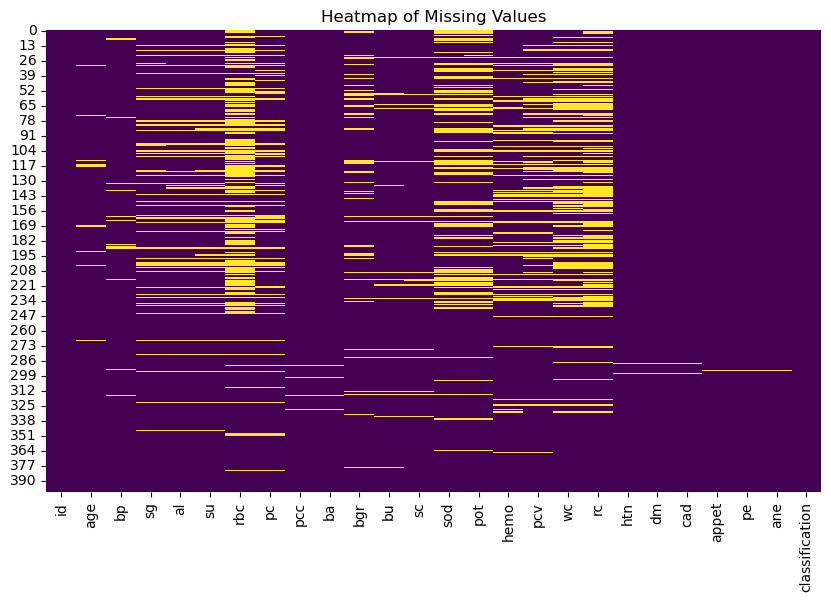

In [10]:
# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

Data Distribution and Outliers

In [11]:
# Check the distribution of numerical variables
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns



Distribution of numerical variables:


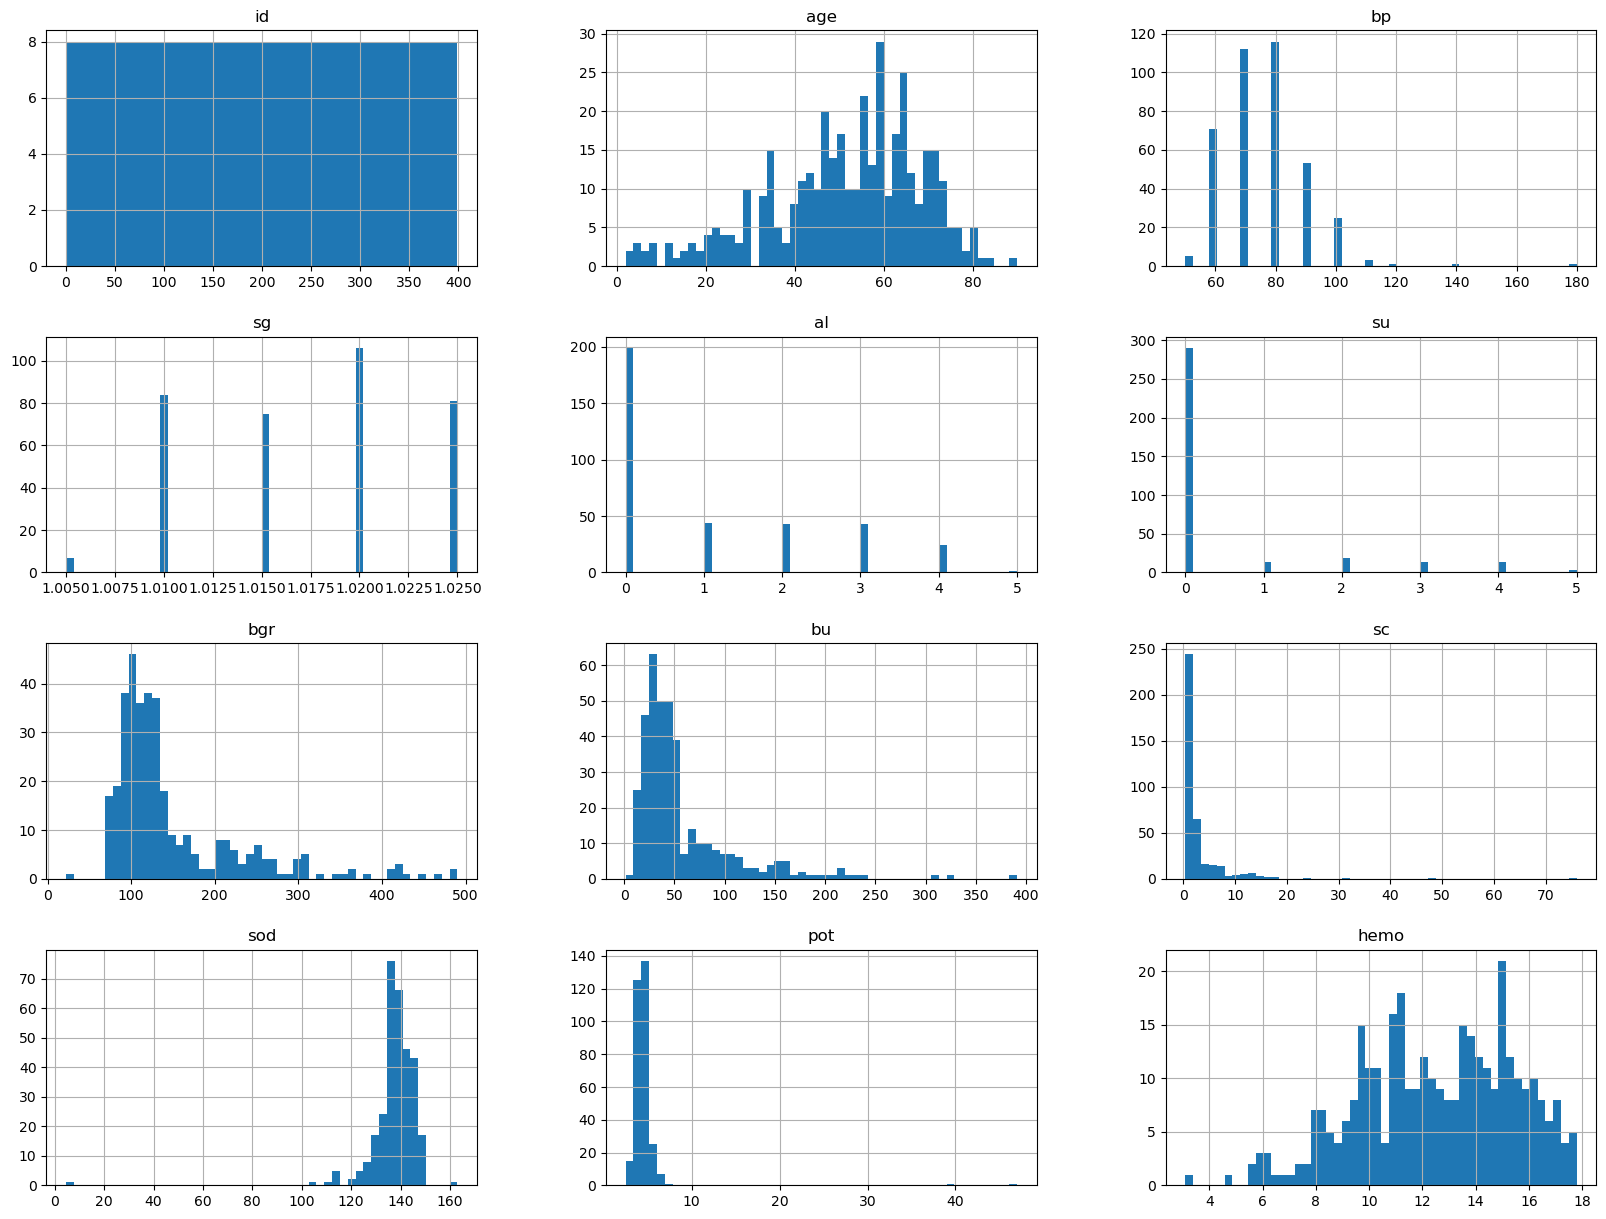

In [12]:
print("\nDistribution of numerical variables:")
data[numerical_columns].hist(bins=50, figsize=(20, 15))
plt.show()


Box plots of numerical variables to identify outliers:


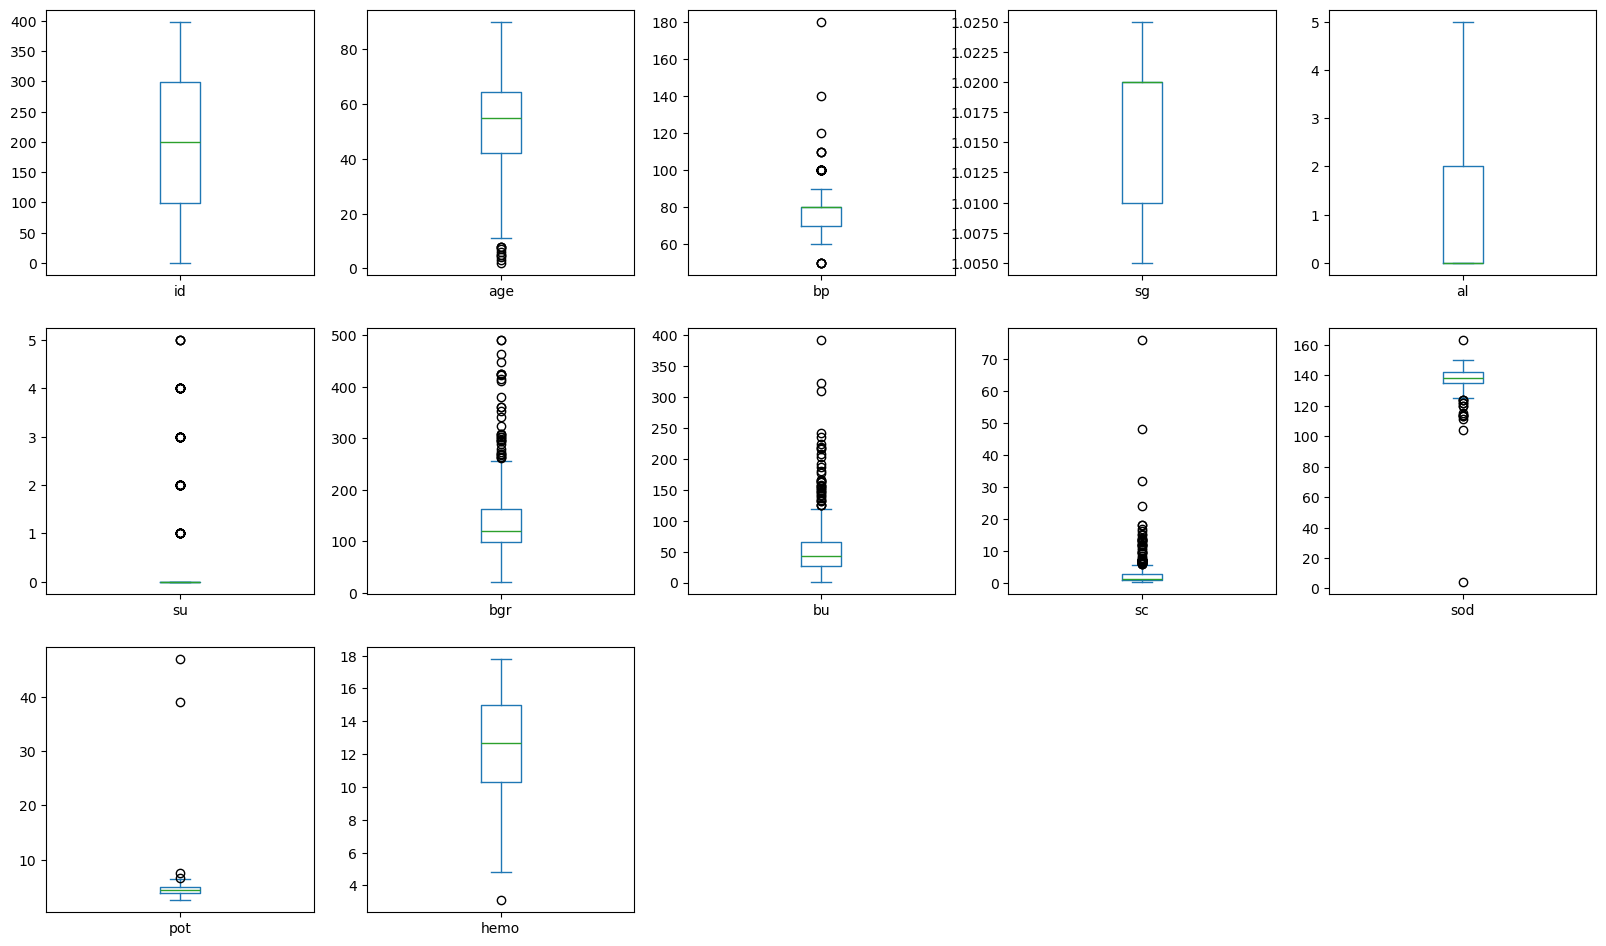

In [13]:
# Box plots to identify outliers
print("\nBox plots of numerical variables to identify outliers:")
data[numerical_columns].plot(kind='box', subplots=True, layout=(5, 5), figsize=(20, 20), sharex=False, sharey=False)
plt.show()

In [14]:
# Check unique values in categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns

print("\nUnique values in categorical variables:")
for column in categorical_columns:
    print(f"\n{column}:")
    print(data[column].value_counts())


Unique values in categorical variables:

rbc:
rbc
normal      201
abnormal     47
Name: count, dtype: int64

pc:
pc
normal      259
abnormal     76
Name: count, dtype: int64

pcc:
pcc
notpresent    354
present        42
Name: count, dtype: int64

ba:
ba
notpresent    374
present        22
Name: count, dtype: int64

pcv:
pcv
41      21
52      21
44      19
48      19
40      16
43      14
42      13
45      13
32      12
36      12
33      12
50      12
28      12
34      11
37      11
30       9
29       9
35       9
46       9
31       8
24       7
39       7
26       6
38       5
53       4
51       4
49       4
47       4
54       4
25       3
27       3
22       3
19       2
23       2
15       1
21       1
17       1
20       1
\t43     1
18       1
9        1
14       1
\t?      1
16       1
Name: count, dtype: int64

wc:
wc
9800     11
6700     10
9200      9
9600      9
7200      9
         ..
19100     1
\t?       1
12300     1
14900     1
12700     1
Name: count, Length: 92

Correlation Analysis


Correlation matrix of numerical variables:
            id       age        bp        sg        al        su       bgr  \
id    1.000000 -0.185308 -0.245744  0.642156 -0.541993 -0.283416 -0.338673   
age  -0.185308  1.000000  0.159480 -0.191096  0.122091  0.220866  0.244992   
bp   -0.245744  0.159480  1.000000 -0.218836  0.160689  0.222576  0.160193   
sg    0.642156 -0.191096 -0.218836  1.000000 -0.469760 -0.296234 -0.374710   
al   -0.541993  0.122091  0.160689 -0.469760  1.000000  0.269305  0.379464   
su   -0.283416  0.220866  0.222576 -0.296234  0.269305  1.000000  0.717827   
bgr  -0.338673  0.244992  0.160193 -0.374710  0.379464  0.717827  1.000000   
bu   -0.307175  0.196985  0.188517 -0.314295  0.453528  0.168583  0.143322   
sc   -0.268683  0.132531  0.146222 -0.361473  0.399198  0.223244  0.114875   
sod   0.364251 -0.100046 -0.116422  0.412190 -0.459896 -0.131776 -0.267848   
pot  -0.092347  0.058377  0.075151 -0.072787  0.129038  0.219450  0.066966   
hemo  0.640298 -0.19

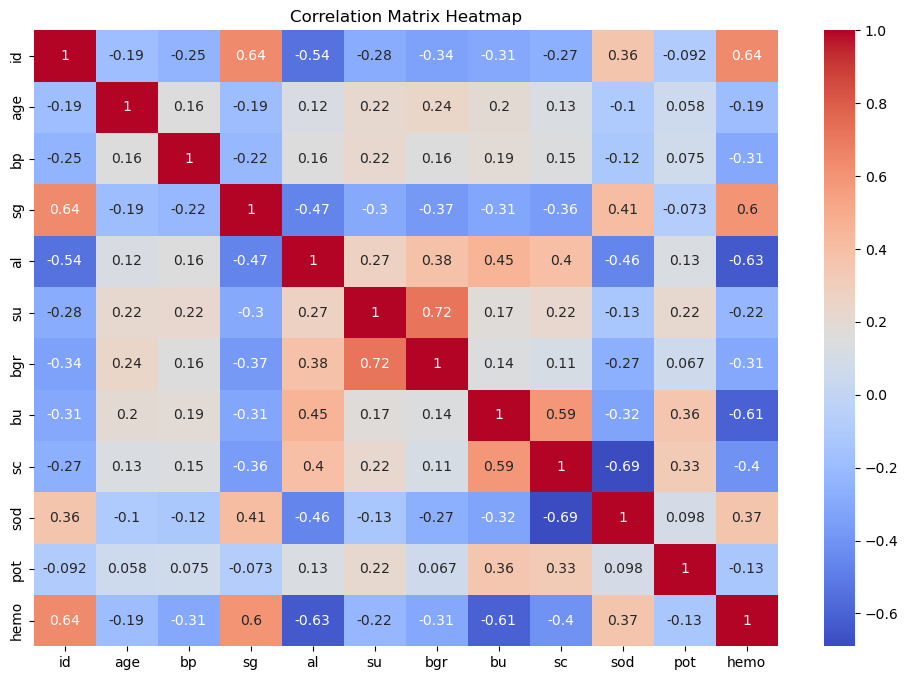

In [15]:
# Select only numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Correlation matrix for numerical variables
correlation_matrix = data[numerical_columns].corr()
print("\nCorrelation matrix of numerical variables:")
print(correlation_matrix)

# Heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


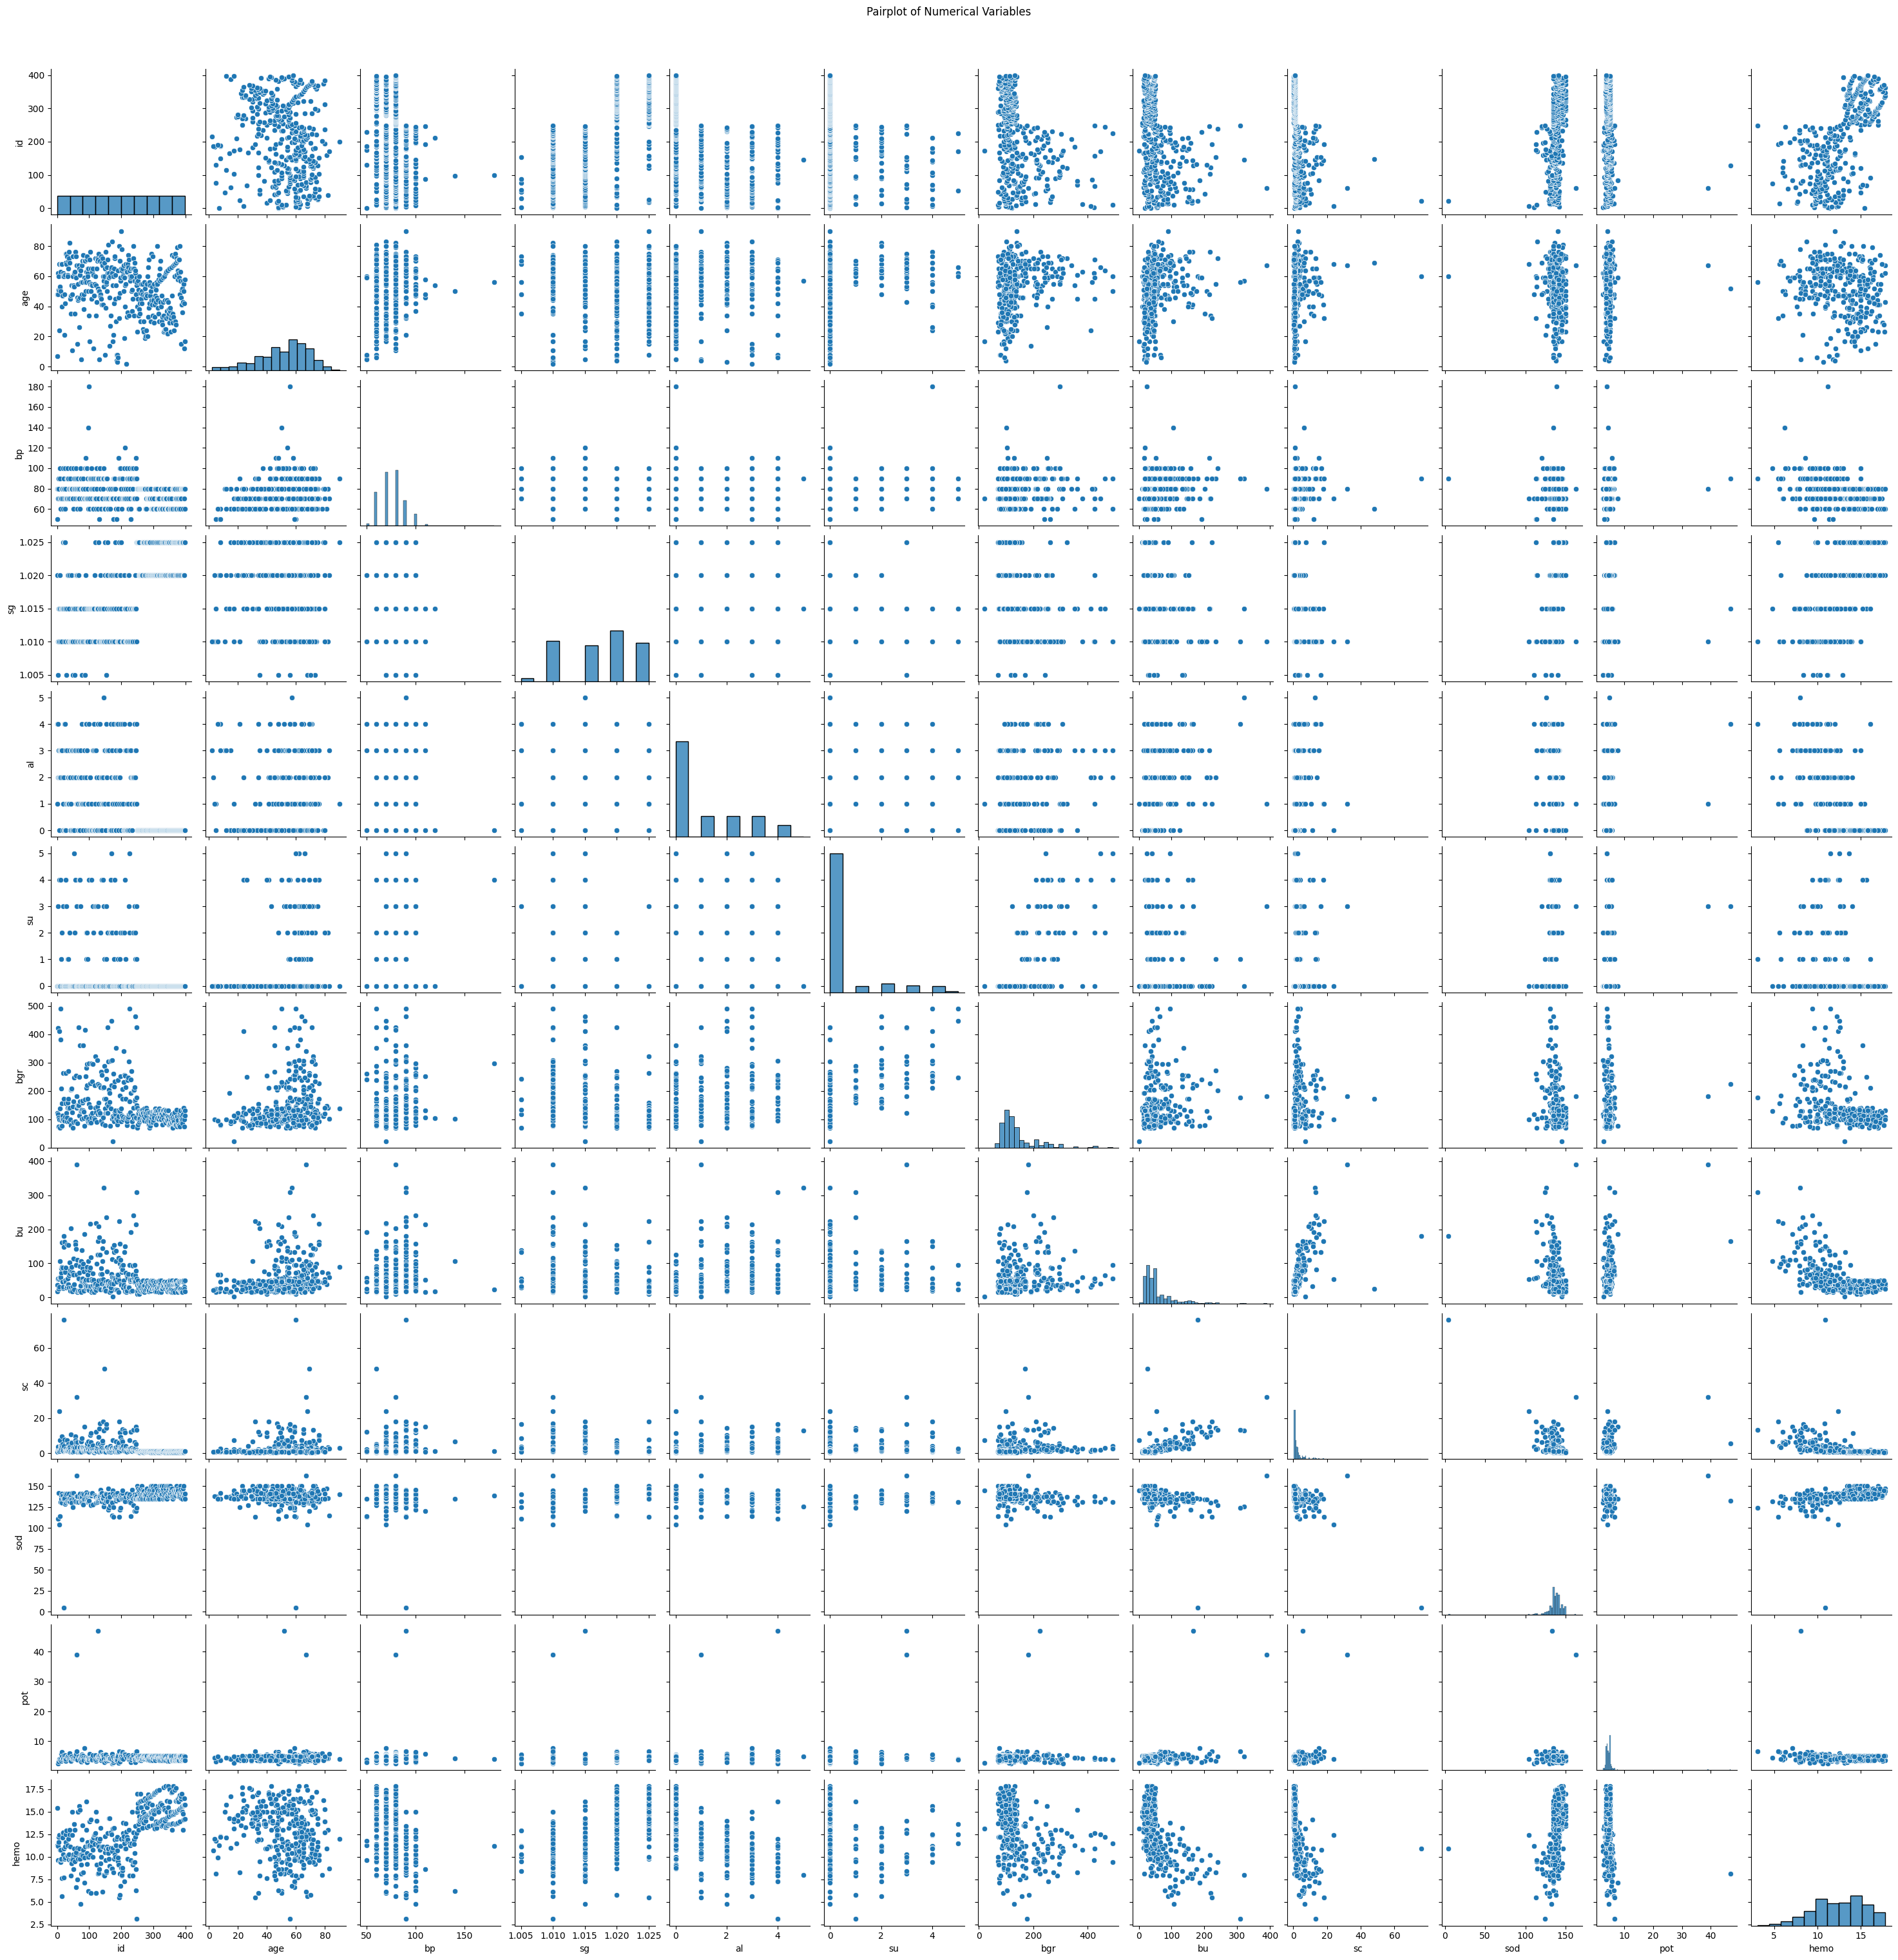

In [ ]:
# Pairplot for key numerical variables
sns.pairplot(data[numerical_columns])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


In [16]:
# Cross-tabulation for key categorical variables
print("\nCross-tabulation between 'classification' and other categorical variables:")
for column in categorical_columns:
    if column != 'classification':
        print(f"\n{column} vs Classification:")
        print(pd.crosstab(data[column], data['classification']))



Cross-tabulation between 'classification' and other categorical variables:

rbc vs Classification:
classification  ckd  ckd\t  notckd
rbc                               
abnormal         47      0       0
normal           59      1     141

pc vs Classification:
classification  ckd  ckd\t  notckd
pc                                
abnormal         75      1       0
normal          118      0     141

pcc vs Classification:
classification  ckd  ckd\t  notckd
pcc                               
notpresent      207      1     146
present          41      1       0

ba vs Classification:
classification  ckd  ckd\t  notckd
ba                                
notpresent      226      2     146
present          22      0       0

pcv vs Classification:
classification  ckd  ckd\t  notckd
pcv                               
\t43              1      0       0
\t?               1      0       0
14                1      0       0
15                1      0       0
16                1      0       0
1

These cross-tabulations provide valuable insights into the relationships between various categorical variables and the classification of chronic kidney disease (CKD). Let's break down the key findings:
RBC (Red Blood Cells):
Abnormal RBC counts are only present in CKD cases.
Normal RBC counts are seen in both CKD and non-CKD cases, but more frequently in non-CKD.
PC (Pus Cell):
Abnormal PC counts are almost exclusively associated with CKD.
Normal PC counts are seen in both CKD and non-CKD cases.
PCC (Pus Cell Clumps):
Present only in CKD cases.
Absent in both CKD and non-CKD cases.
BA (Bacteria):
Present only in CKD cases.
Absent in both CKD and non-CKD cases.
PCV (Packed Cell Volume):
Lower PCV values (< 40) are predominantly associated with CKD.
Higher PCV values (≥ 40) are more common in non-CKD cases.
WC (White Blood Cells) and RC (Red Blood Cells Count):
Show variations across both CKD and non-CKD cases.
Certain ranges might be more indicative of CKD or non-CKD.
HTN (Hypertension):
Present in all CKD cases.
Absent in all non-CKD cases.
DM (Diabetes Mellitus):
Present in most CKD cases.
Absent in all non-CKD cases.
CAD (Coronary Artery Disease):
Present only in some CKD cases.
Absent in all non-CKD cases.
Appetite:
Poor appetite is only associated with CKD cases.
Good appetite is seen in both CKD and non-CKD cases.
PE (Pedal Edema):
Present only in some CKD cases.
Absent in all non-CKD cases.
ANE (Anemia):
Present only in some CKD cases.
Absent in all non-CKD cases.
Overall, these cross-tabulations suggest that certain factors like abnormal RBC and PC counts, presence of PCC and BA, hypertension, diabetes, poor appetite, pedal edema, and anemia are strongly associated with CKD. The data also indicates that some variables (like PCV, WC, and RC) might have specific ranges that are more indicative of CKD or non-CKD status. This information can be valuable for developing diagnostic criteria and understanding risk factors for chronic kidney disease.

In [17]:
# Handling missing values (example: impute with median for numerical columns)
data_filled = data.copy()
for column in numerical_columns:
    data_filled[column].fillna(data_filled[column].median(), inplace=True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_8444\553699534.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_filled[column].fillna(data_filled[column].median(), inplace=True)


In [18]:
# Handling missing values (example: impute with median for numerical columns)
data_filled = data.copy()

# Fill missing values for numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data_filled[numerical_columns] = data_filled[numerical_columns].apply(lambda col: col.fillna(col.median()))

# For categorical variables, fill with mode
categorical_columns = data.select_dtypes(include=['object']).columns
data_filled[categorical_columns] = data_filled[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

# Verify the cleaning process
print("\nMissing values after handling:")
print(data_filled.isnull().sum())



Missing values after handling:
id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


Exploratory Data Analysis


Box plots for numerical variables:


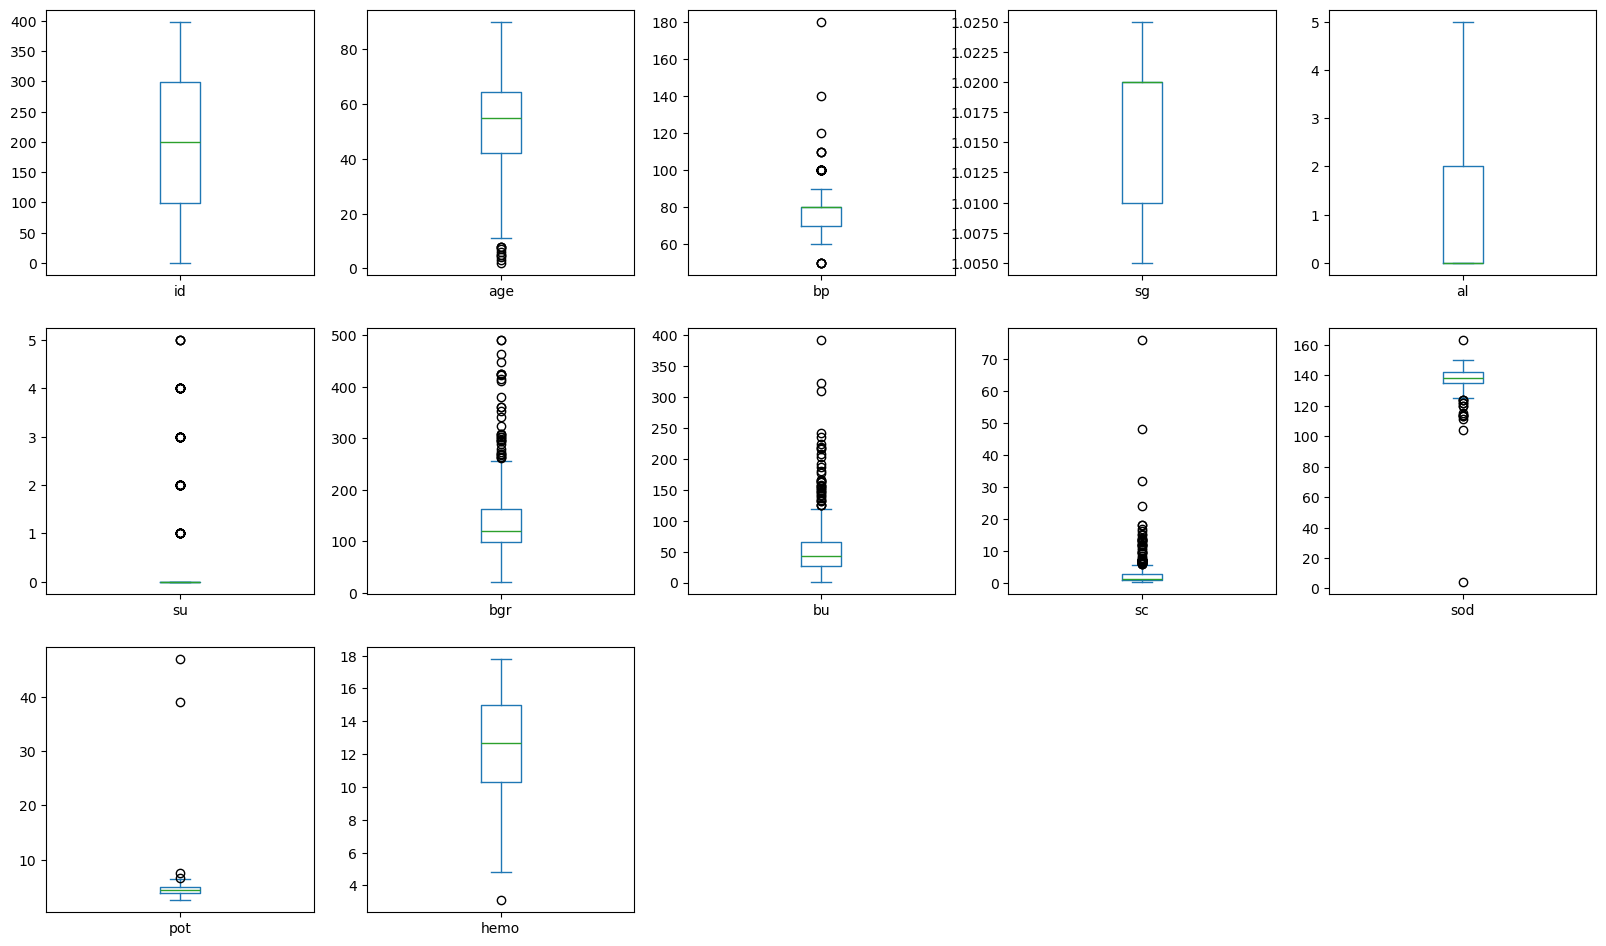

In [19]:
# Box plots for numerical variables
print("\nBox plots for numerical variables:")
data.plot(kind='box', subplots=True, layout=(5, 5), figsize=(20, 20), sharex=False, sharey=False)
plt.show()


Scatter plots for key variables:


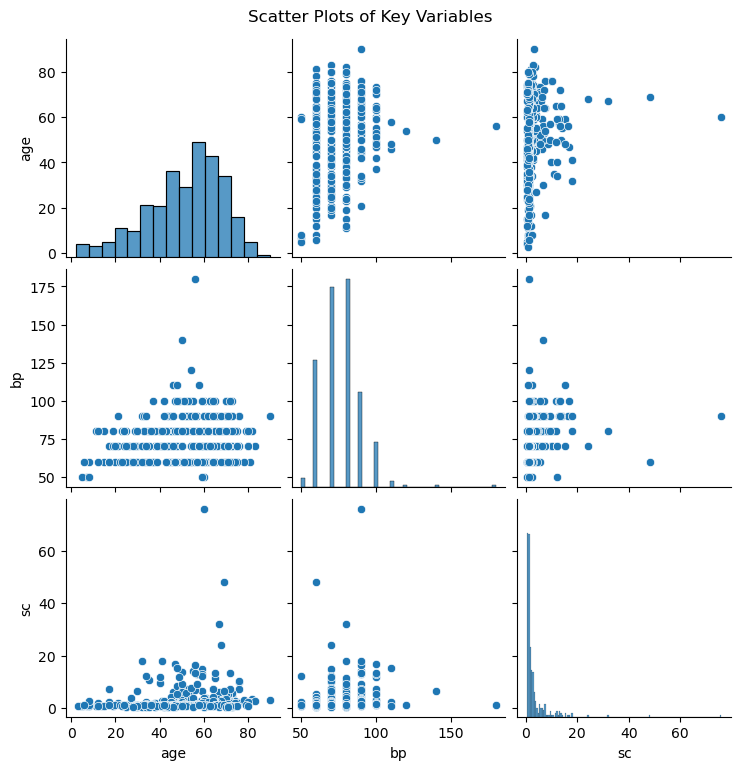

In [20]:
# Scatter plots for key variables
print("\nScatter plots for key variables:")
key_vars = ['age', 'bp', 'sc']  # Example key variables
sns.pairplot(data[key_vars])
plt.suptitle('Scatter Plots of Key Variables', y=1.02)
plt.show()


Correlation matrix of numerical variables:
            id       age        bp        sg        al        su       bgr  \
id    1.000000 -0.185308 -0.245744  0.642156 -0.541993 -0.283416 -0.338673   
age  -0.185308  1.000000  0.159480 -0.191096  0.122091  0.220866  0.244992   
bp   -0.245744  0.159480  1.000000 -0.218836  0.160689  0.222576  0.160193   
sg    0.642156 -0.191096 -0.218836  1.000000 -0.469760 -0.296234 -0.374710   
al   -0.541993  0.122091  0.160689 -0.469760  1.000000  0.269305  0.379464   
su   -0.283416  0.220866  0.222576 -0.296234  0.269305  1.000000  0.717827   
bgr  -0.338673  0.244992  0.160193 -0.374710  0.379464  0.717827  1.000000   
bu   -0.307175  0.196985  0.188517 -0.314295  0.453528  0.168583  0.143322   
sc   -0.268683  0.132531  0.146222 -0.361473  0.399198  0.223244  0.114875   
sod   0.364251 -0.100046 -0.116422  0.412190 -0.459896 -0.131776 -0.267848   
pot  -0.092347  0.058377  0.075151 -0.072787  0.129038  0.219450  0.066966   
hemo  0.640298 -0.19

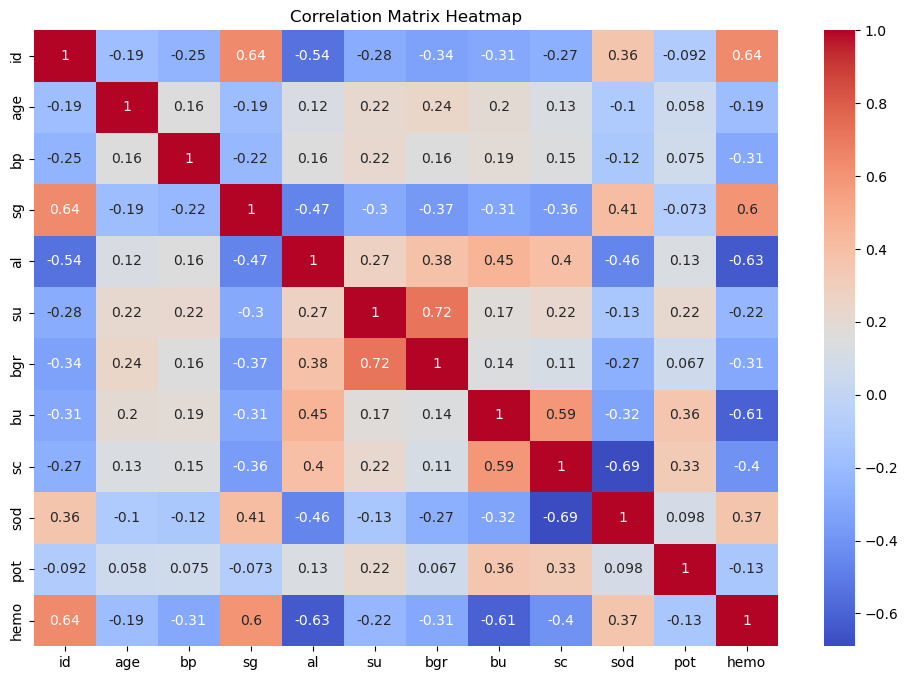

In [21]:
# Heatmaps or correlation matrices to show relationships between variables
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_columns].corr()
print("\nCorrelation matrix of numerical variables:")
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [22]:
# Correlation between blood pressure and albumin levels
bp_al_correlation = data[['bp', 'al']].corr()
print("\nCorrelation between blood pressure and albumin levels:")
print(bp_al_correlation)


Correlation between blood pressure and albumin levels:
          bp        al
bp  1.000000  0.160689
al  0.160689  1.000000


The correlation is positive, meaning that as blood pressure tends to increase, albumin levels also tend to increase slightly, and vice versa.
However, the correlation is weak (close to 0), suggesting that the relationship is not very strong or consistent.


Impact of diabetes and hypertension on kidney health:


c:\Users\shiva\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


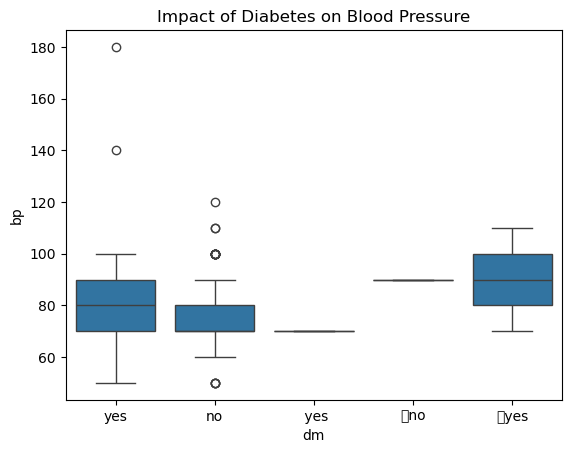

In [23]:
# Analyze how diabetes and hypertension impact kidney health
print("\nImpact of diabetes and hypertension on kidney health:")
sns.boxplot(x='dm', y='bp', data=data)
plt.title('Impact of Diabetes on Blood Pressure')
plt.show()

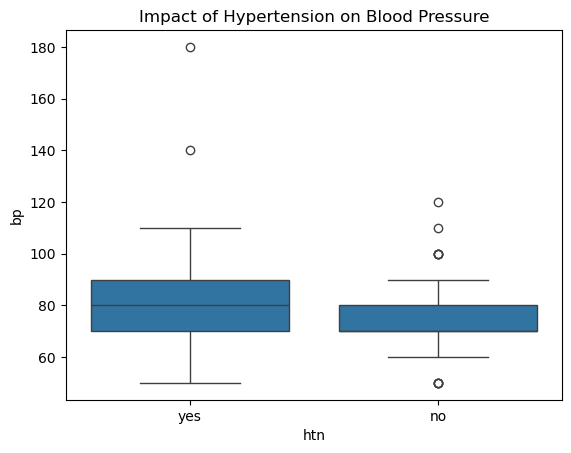

In [24]:
sns.boxplot(x='htn', y='bp', data=data)
plt.title('Impact of Hypertension on Blood Pressure')
plt.show()

Hypertension Group (htn = "yes"):

The median BP is around 85 mmHg.
The middle 50% of individuals have BP between approximately 75 and 95 mmHg.
There are outliers with BP values above 140 mmHg and below 50 mmHg.
Non-Hypertension Group (htn = "no"):

The median BP is around 80 mmHg.
The middle 50% of individuals have BP between approximately 70 and 90 mmHg.
There are outliers with BP values above 120 mmHg and below 55 mmHg.
Overall, the graph suggests that individuals with hypertension tend to have higher BP levels compared to those without hypertension. This is indicated by the slightly higher median and overall spread of BP values in the "yes" group.

c:\Users\shiva\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


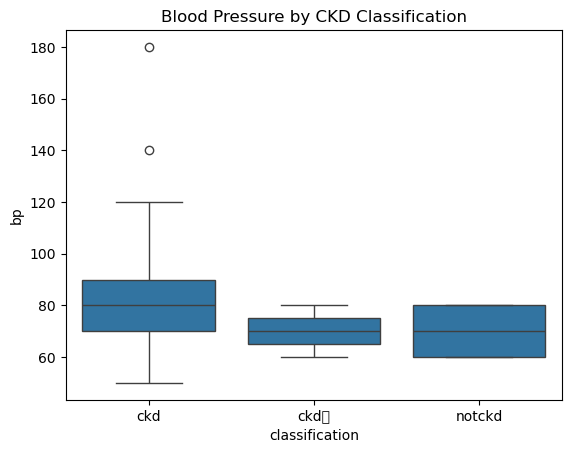

In [25]:
sns.boxplot(x='classification', y='bp', data=data)
plt.title('Blood Pressure by CKD Classification')
plt.show()

 the graph suggests that individuals with CKD tend to have higher BP levels compared to those without CKD. This is indicated by the slightly higher median and overall spread of BP values in the "ckd" and "ckd1" groups.

c:\Users\shiva\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


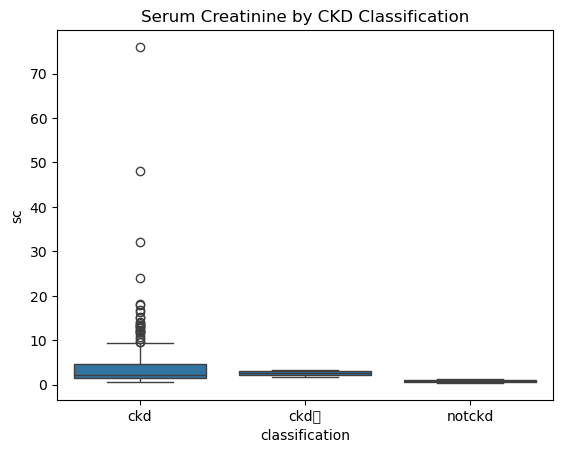

In [26]:
sns.boxplot(x='classification', y='sc', data=data)
plt.title('Serum Creatinine by CKD Classification')
plt.show()



c:\Users\shiva\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


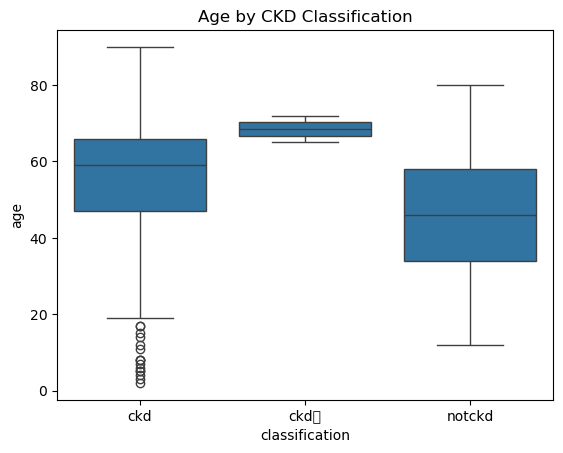

In [27]:
sns.boxplot(x='classification', y='age', data=data)
plt.title('Age by CKD Classification')
plt.show()

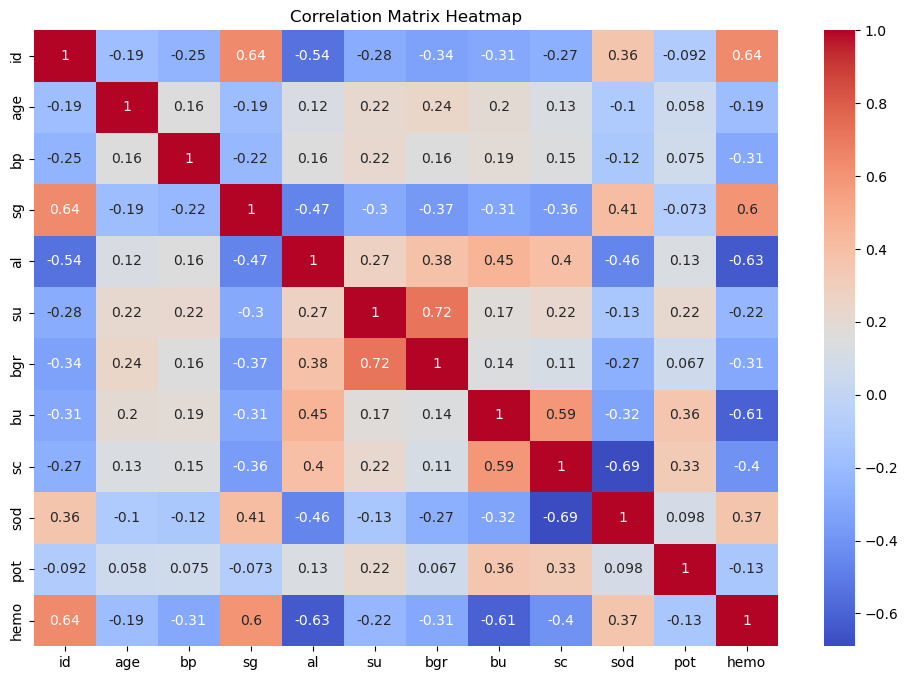

In [28]:
# Saving visualizations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.savefig('correlation_matrix_heatmap.png')

C:\Users\shiva\AppData\Local\Temp\ipykernel_8444\3795556592.py:5: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('impact_of_diabetes_on_bp.png')
C:\Users\shiva\AppData\Local\Temp\ipykernel_8444\3795556592.py:15: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('bp_by_ckd_classification.png')
C:\Users\shiva\AppData\Local\Temp\ipykernel_8444\3795556592.py:20: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('sc_by_ckd_classification.png')
C:\Users\shiva\AppData\Local\Temp\ipykernel_8444\3795556592.py:25: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('age_by_ckd_classification.png')



EDA report with visualizations and key findings generated and saved.


c:\Users\shiva\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


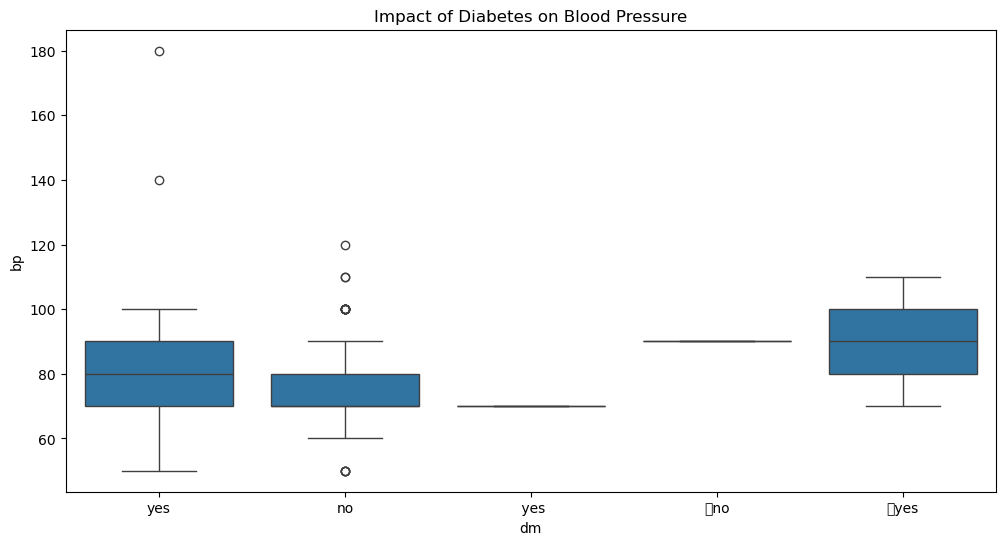

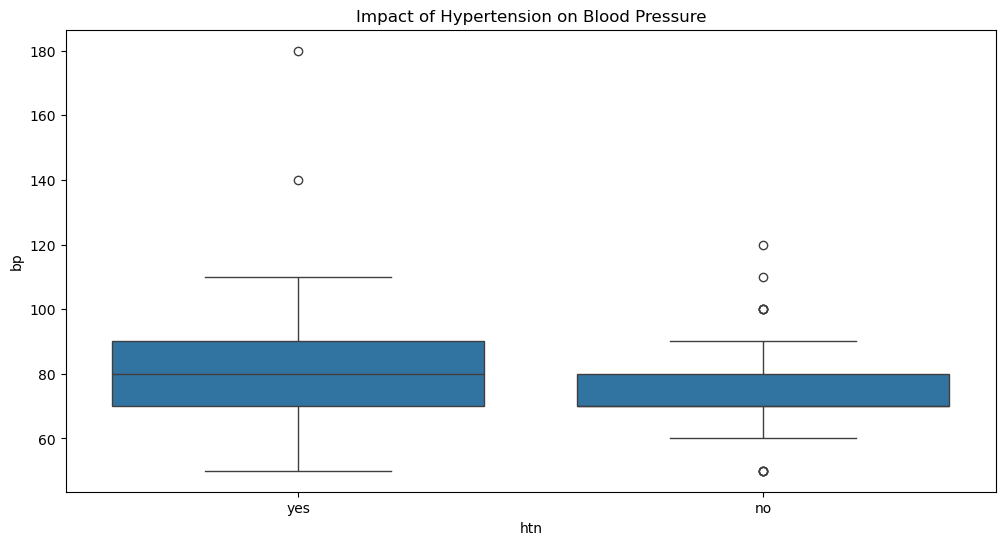

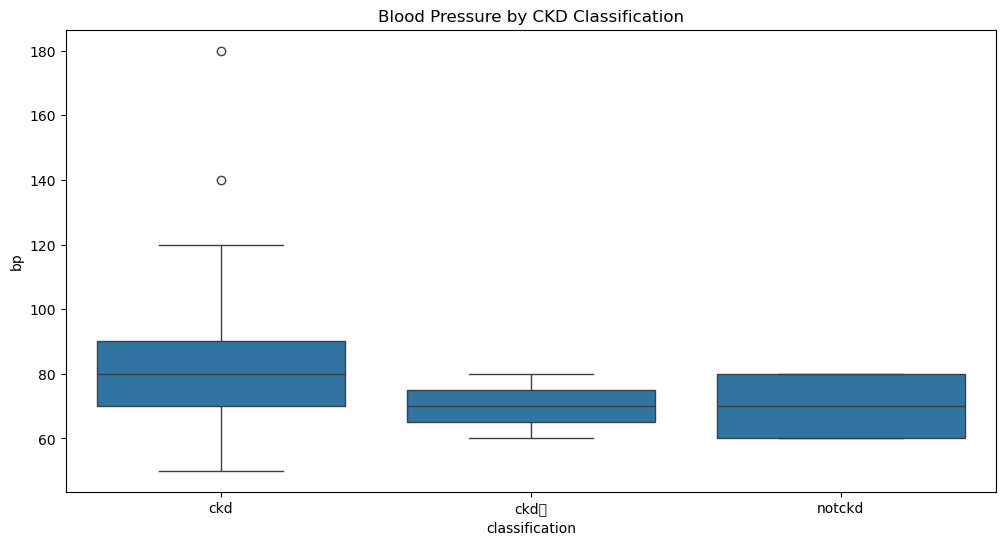

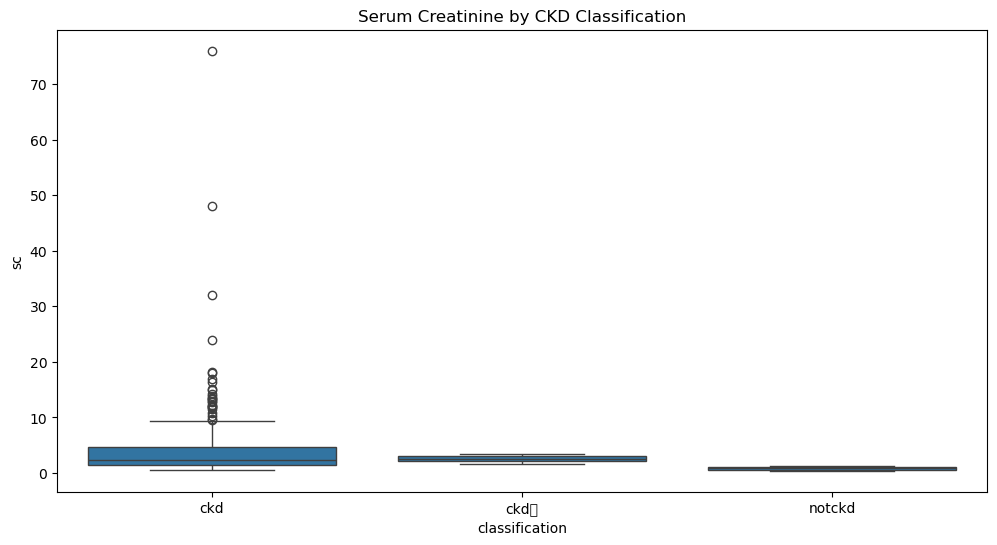

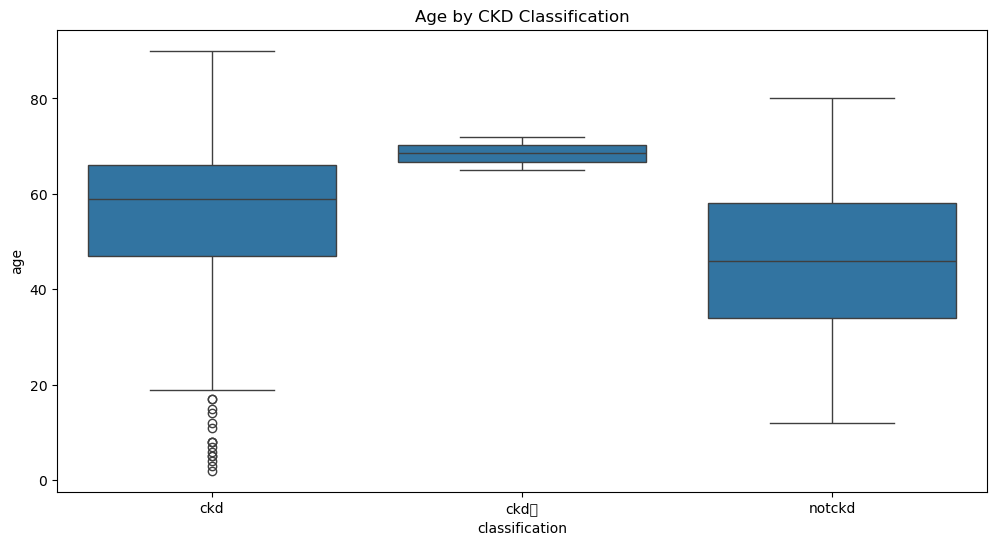

In [29]:
# Box plots for impact analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='dm', y='bp', data=data)
plt.title('Impact of Diabetes on Blood Pressure')
plt.savefig('impact_of_diabetes_on_bp.png')

plt.figure(figsize=(12, 6))
sns.boxplot(x='htn', y='bp', data=data)
plt.title('Impact of Hypertension on Blood Pressure')
plt.savefig('impact_of_htn_on_bp.png')

plt.figure(figsize=(12, 6))
sns.boxplot(x='classification', y='bp', data=data)
plt.title('Blood Pressure by CKD Classification')
plt.savefig('bp_by_ckd_classification.png')

plt.figure(figsize=(12, 6))
sns.boxplot(x='classification', y='sc', data=data)
plt.title('Serum Creatinine by CKD Classification')
plt.savefig('sc_by_ckd_classification.png')

plt.figure(figsize=(12, 6))
sns.boxplot(x='classification', y='age', data=data)
plt.title('Age by CKD Classification')
plt.savefig('age_by_ckd_classification.png')

print("\nEDA report with visualizations and key findings generated and saved.")

Winsorization

In [30]:
!pip install scipy


In [31]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
def winsorize_series(series, limits):
    return winsorize(series, limits=limits)

# Define the limits for winsorization (e.g., 1% on both sides)
limits = (0.01, 0.01)

# Apply winsorization to each numerical column
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data_winsorized = data.copy()
for column in numerical_columns:
    data_winsorized[column] = winsorize_series(data[column], limits)


Histograms before Winsorization:


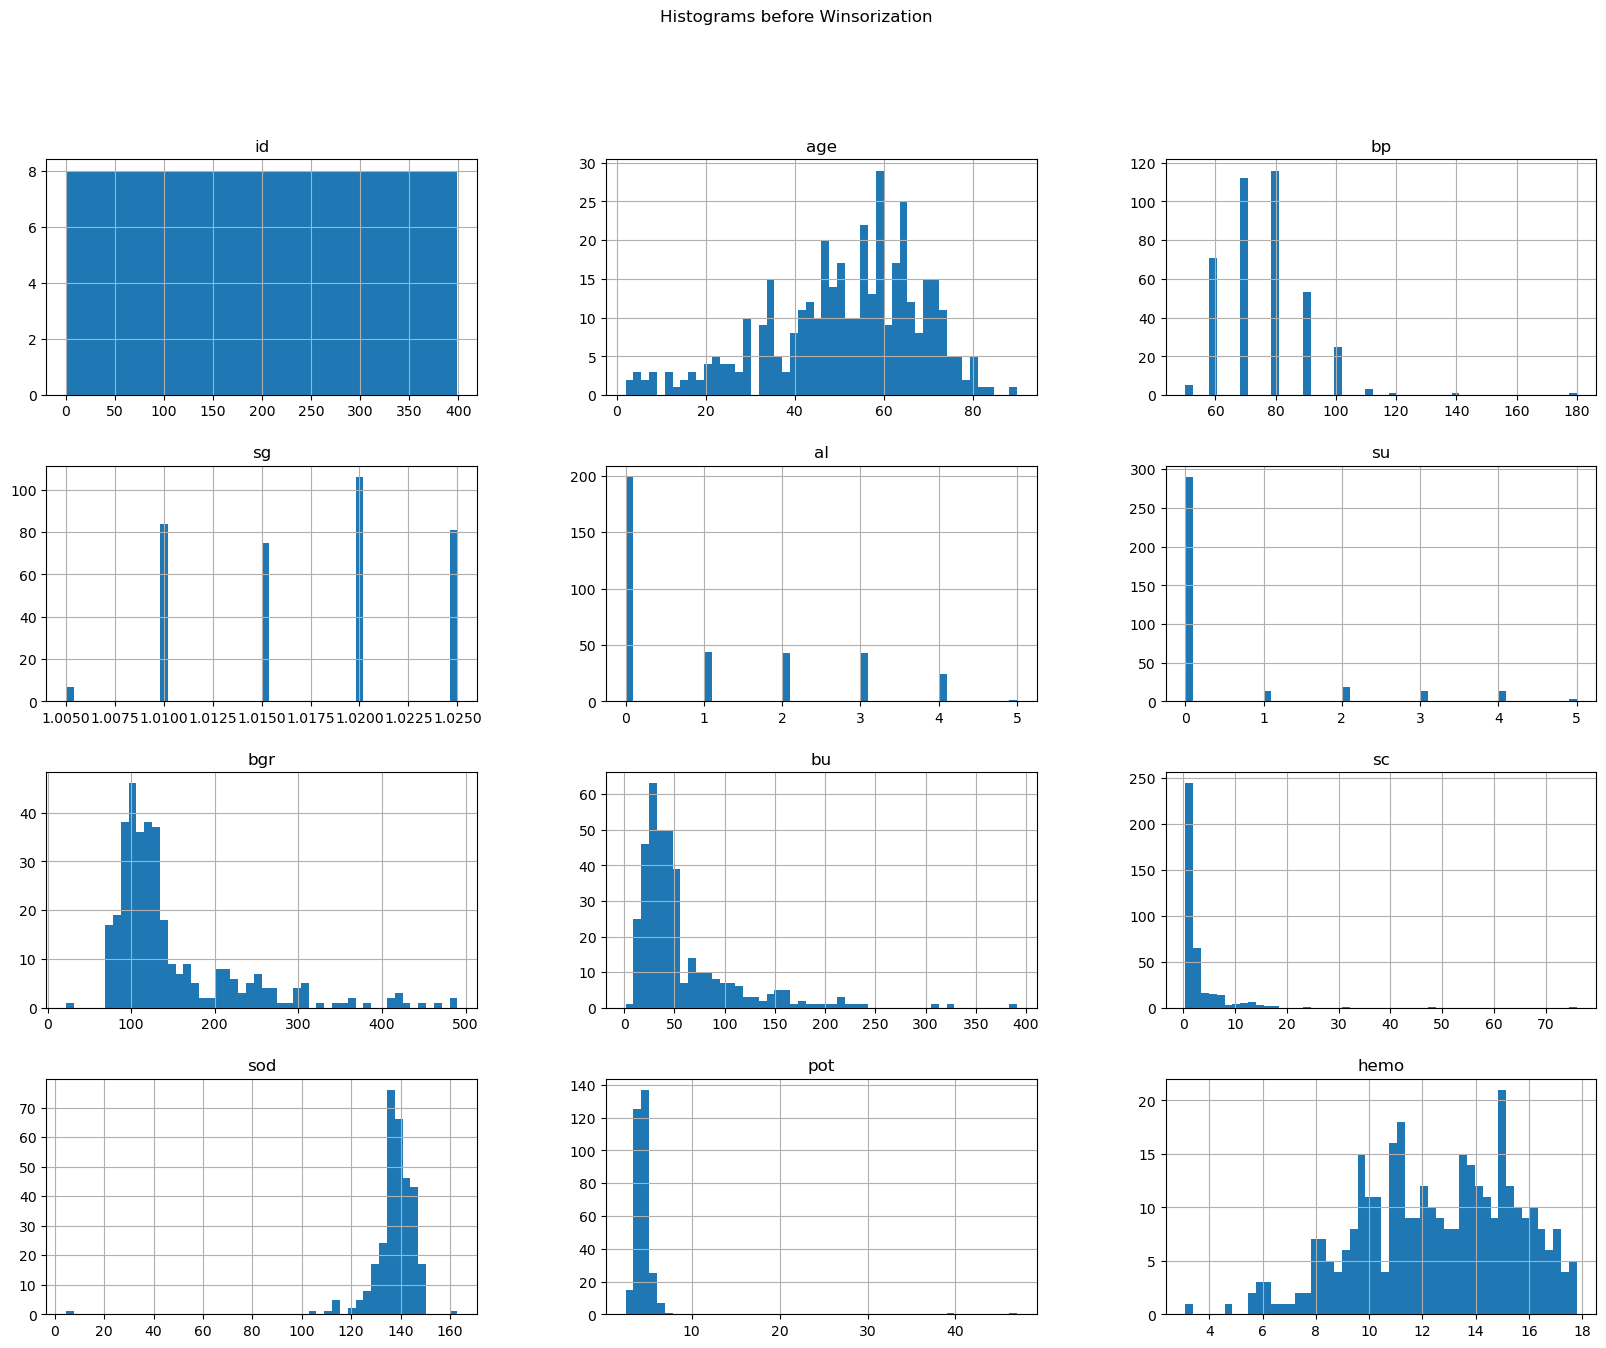

Histograms after Winsorization:


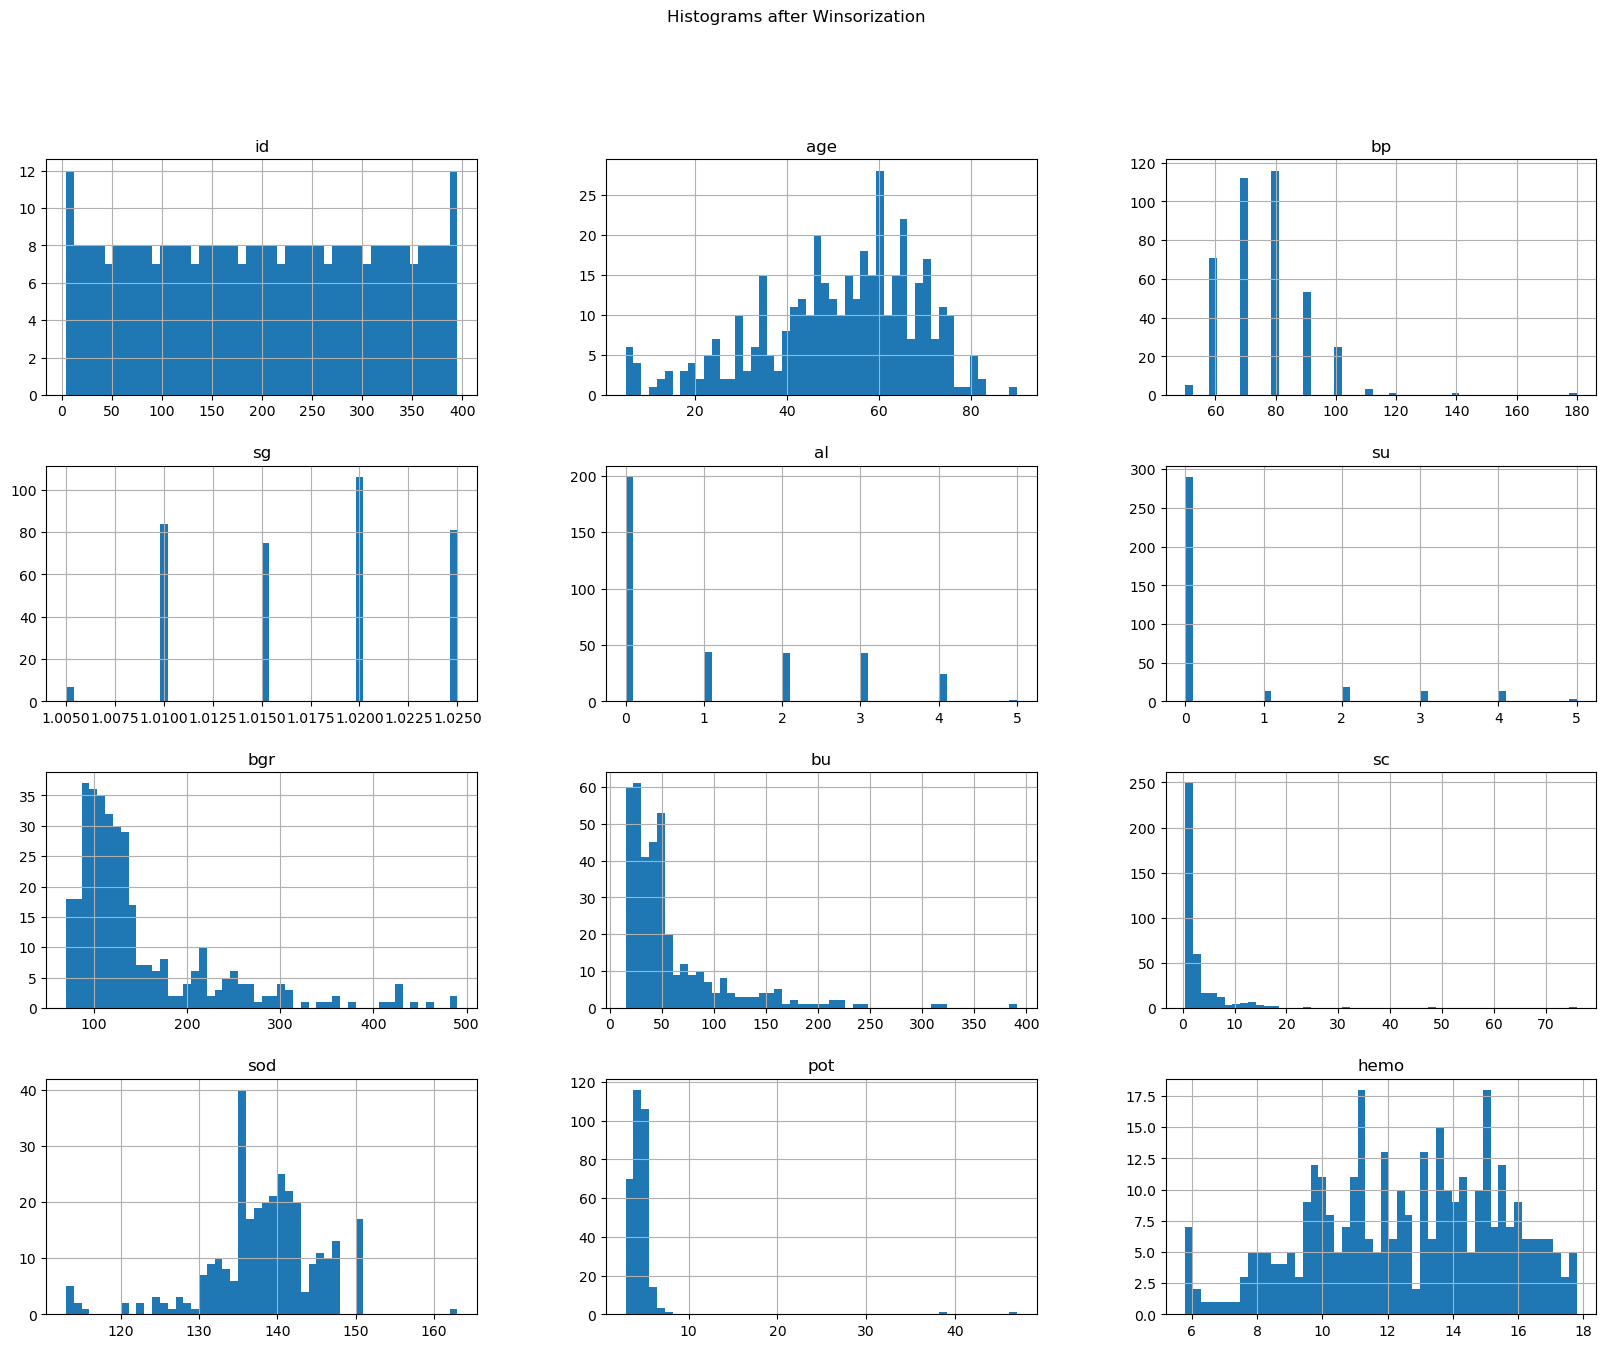

Box plots before Winsorization:


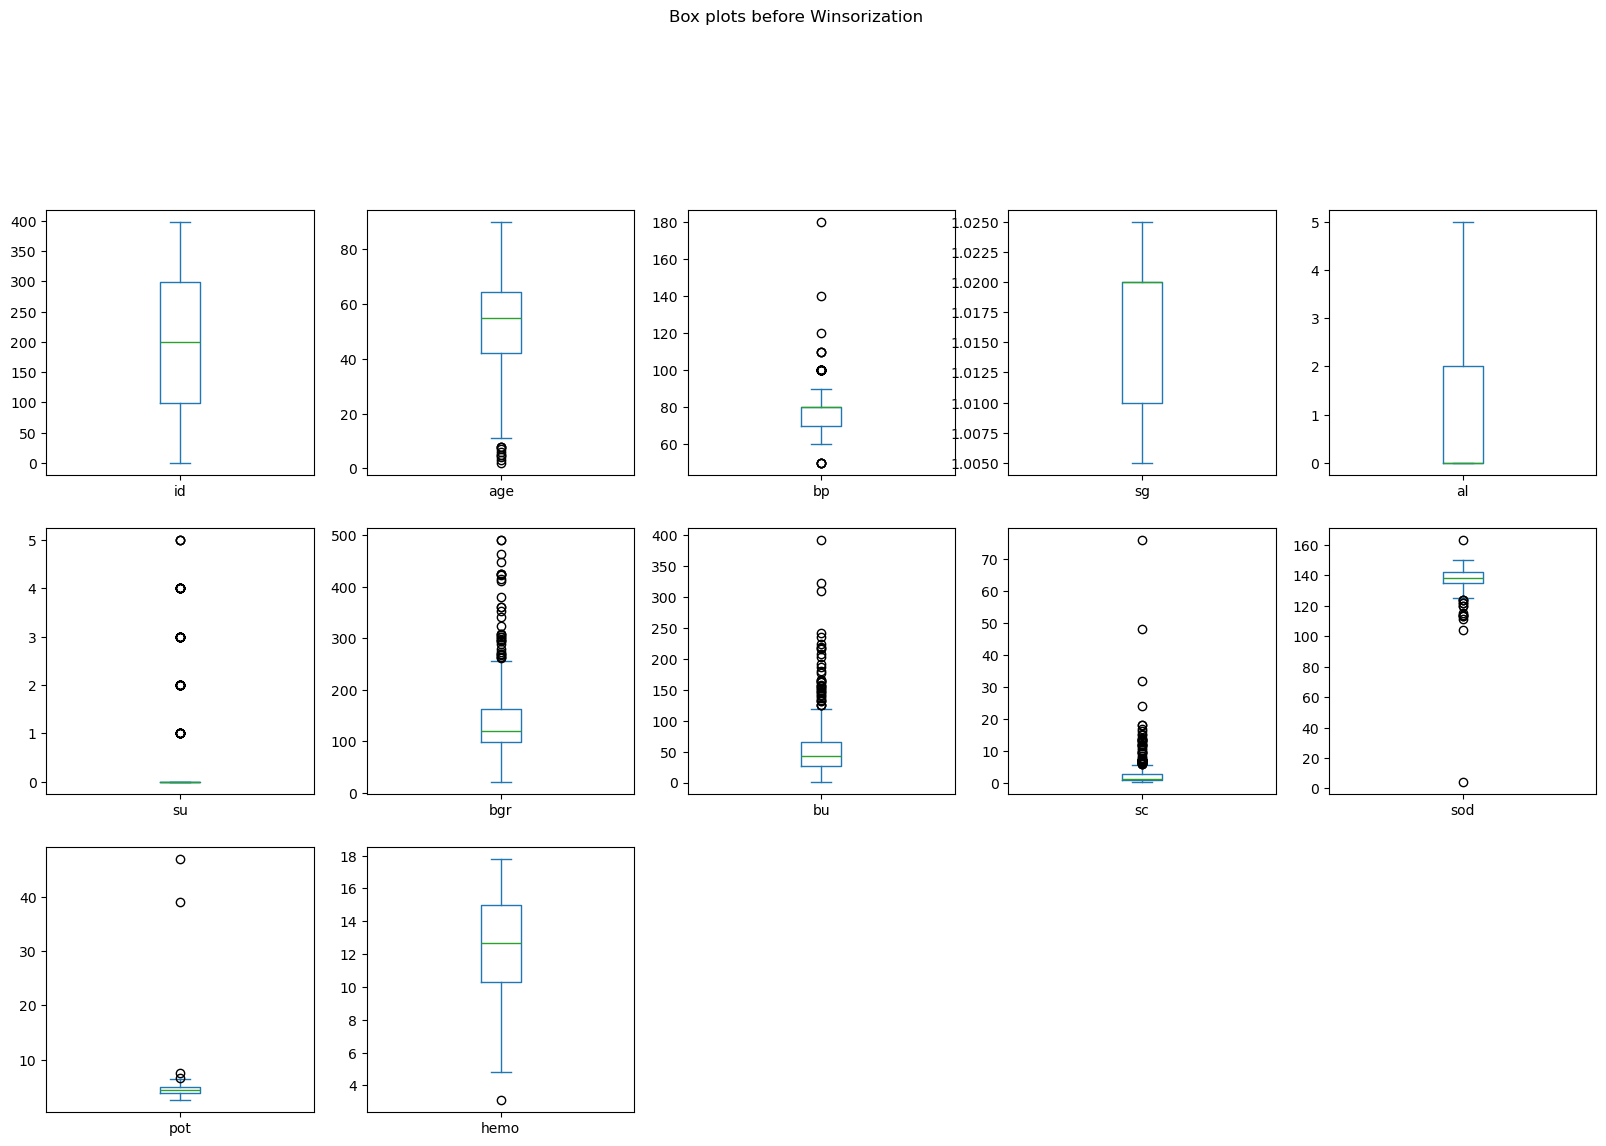

Box plots after Winsorization:


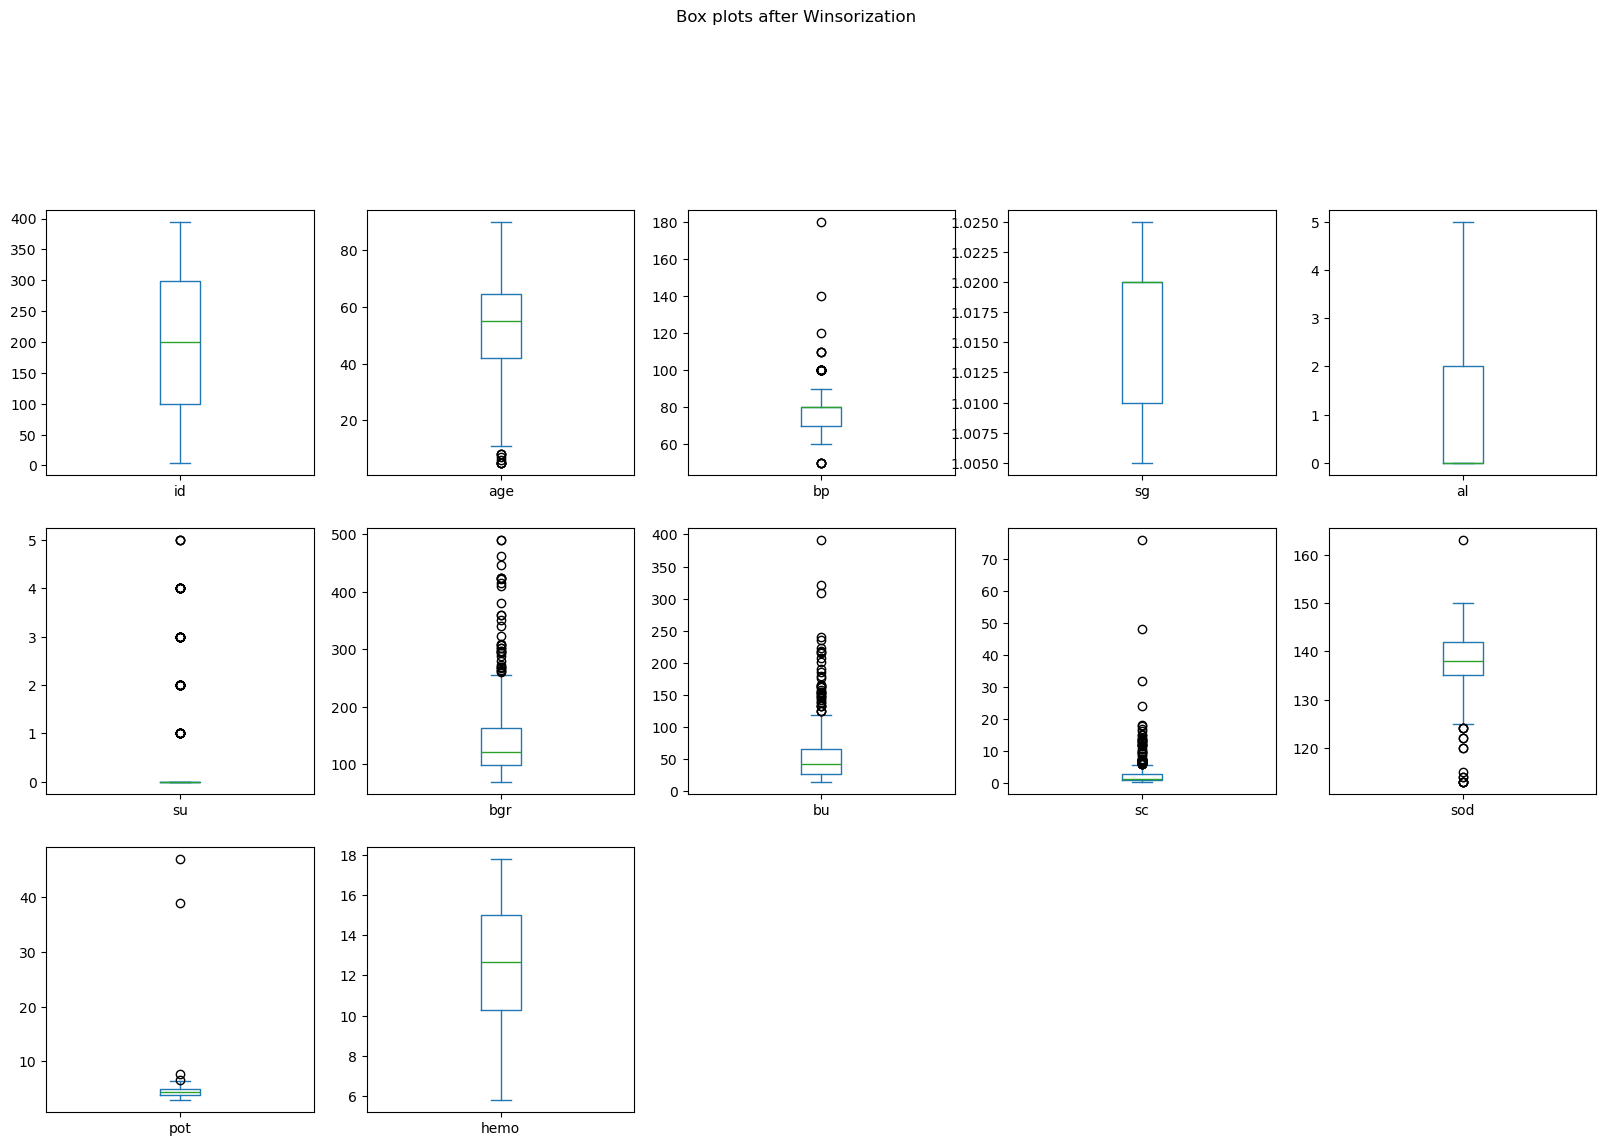

In [33]:
# Histograms before Winsorization
print("Histograms before Winsorization:")
data[numerical_columns].hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms before Winsorization')
plt.show()

# Histograms after Winsorization
print("Histograms after Winsorization:")
data_winsorized[numerical_columns].hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms after Winsorization')
plt.show()

# Box plots before Winsorization
print("Box plots before Winsorization:")
data[numerical_columns].plot(kind='box', subplots=True, layout=(5, 5), figsize=(20, 20), sharex=False, sharey=False)
plt.suptitle('Box plots before Winsorization')
plt.show()

# Box plots after Winsorization
print("Box plots after Winsorization:")
data_winsorized[numerical_columns].plot(kind='box', subplots=True, layout=(5, 5), figsize=(20, 20), sharex=False, sharey=False)
plt.suptitle('Box plots after Winsorization')
plt.show()


In [34]:
def winsorize_series_custom(series, lower_percentile, upper_percentile):
    lower_limit = np.percentile(series.dropna(), lower_percentile)
    upper_limit = np.percentile(series.dropna(), upper_percentile)
    return np.clip(series, lower_limit, upper_limit)

# Define the custom percentiles for winsorization (15th and 80th)
lower_percentile = 15
upper_percentile = 80

# Apply winsorization to each numerical column
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data_winsorized = data.copy()
for column in numerical_columns:
    data_winsorized[column] = winsorize_series_custom(data[column], lower_percentile, upper_percentile)


Histograms before Winsorization:


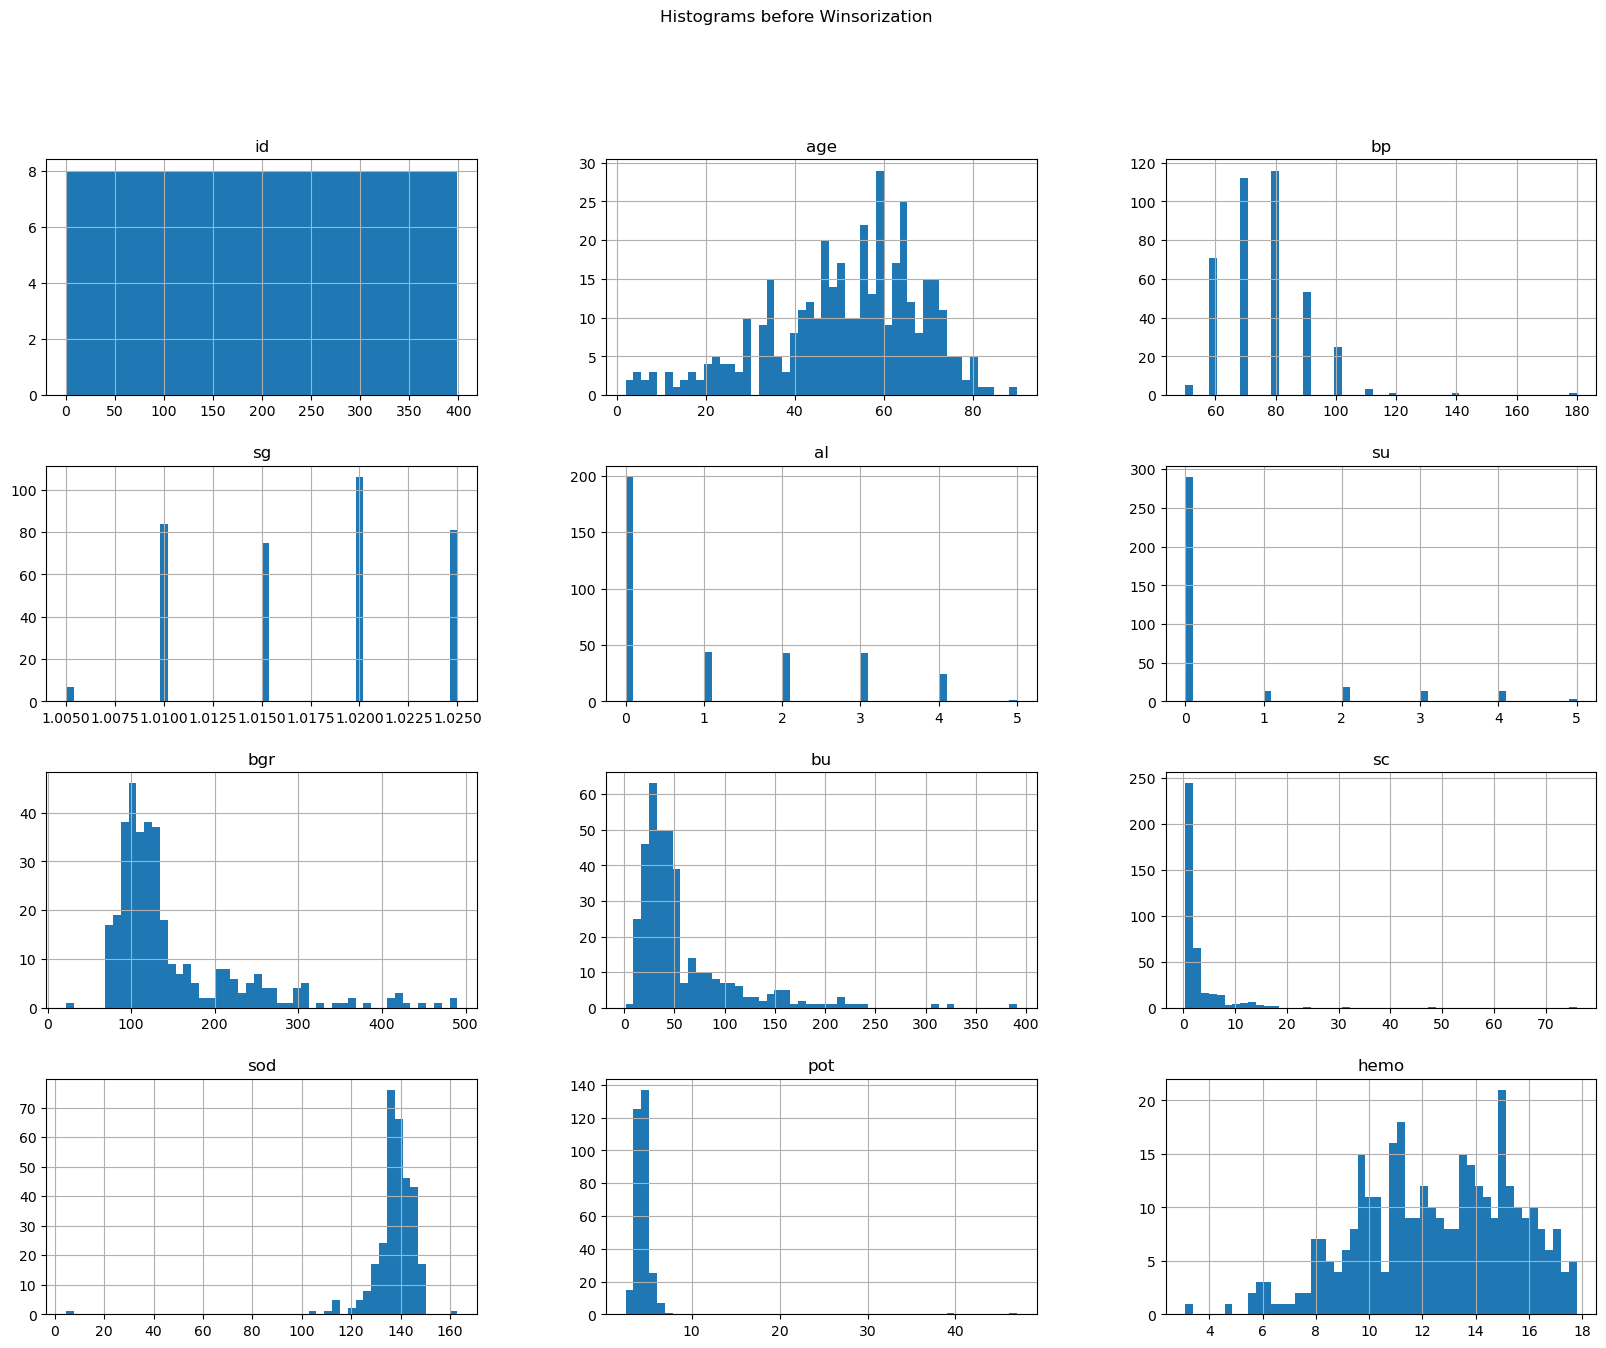

Histograms after Winsorization:


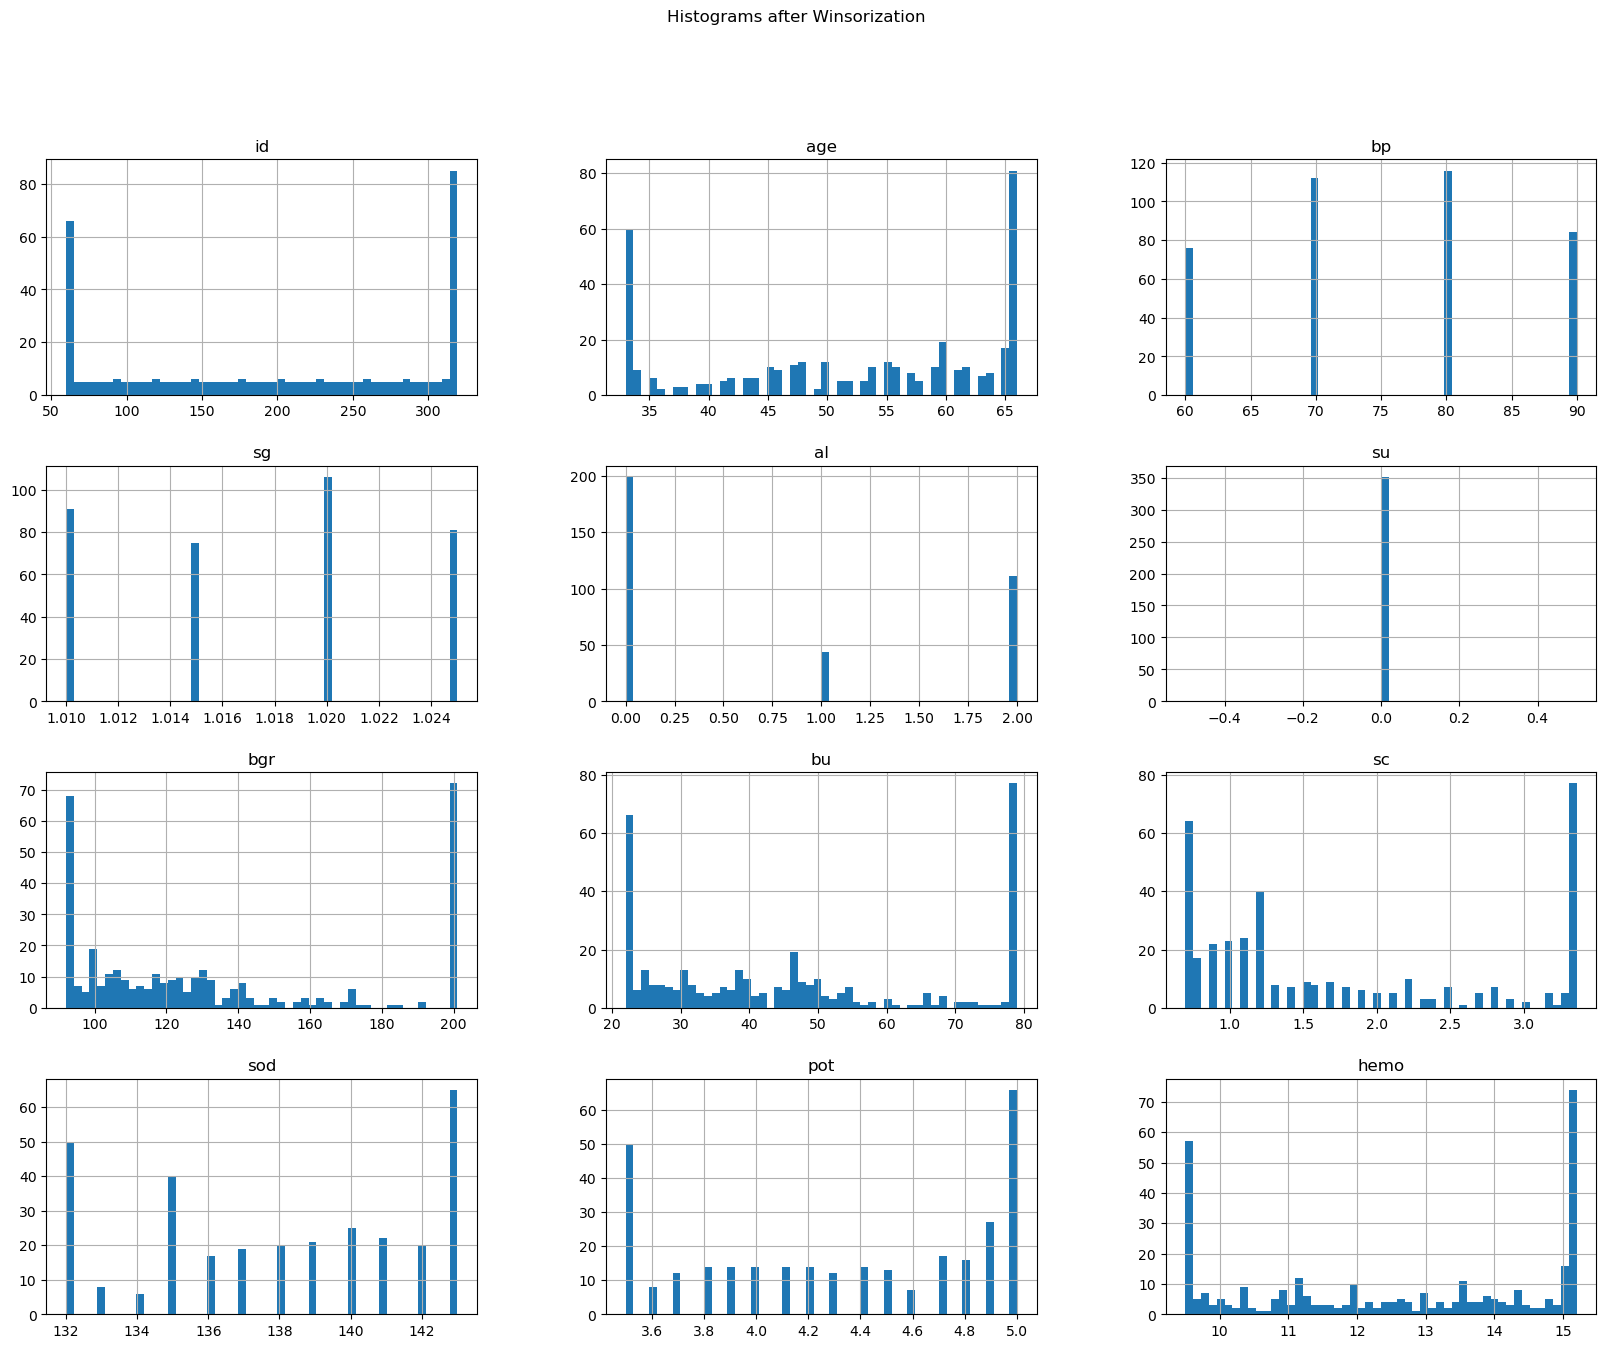

Box plots before Winsorization:


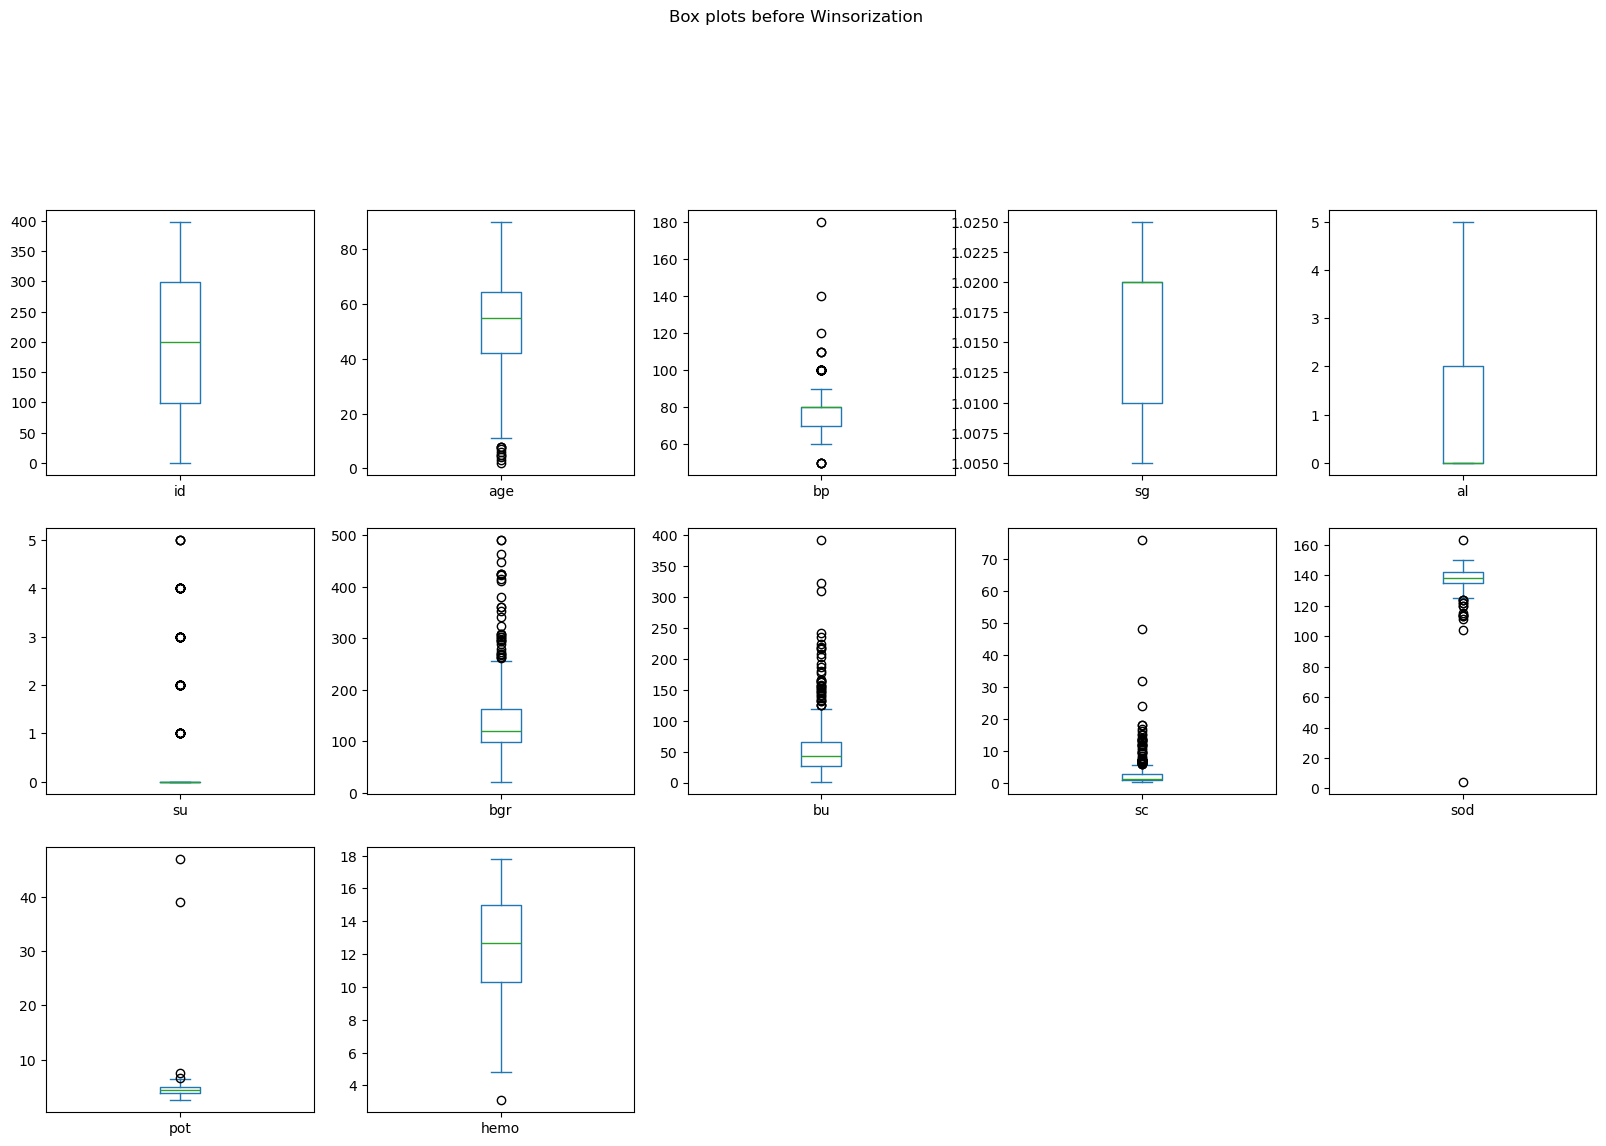

Box plots after Winsorization:


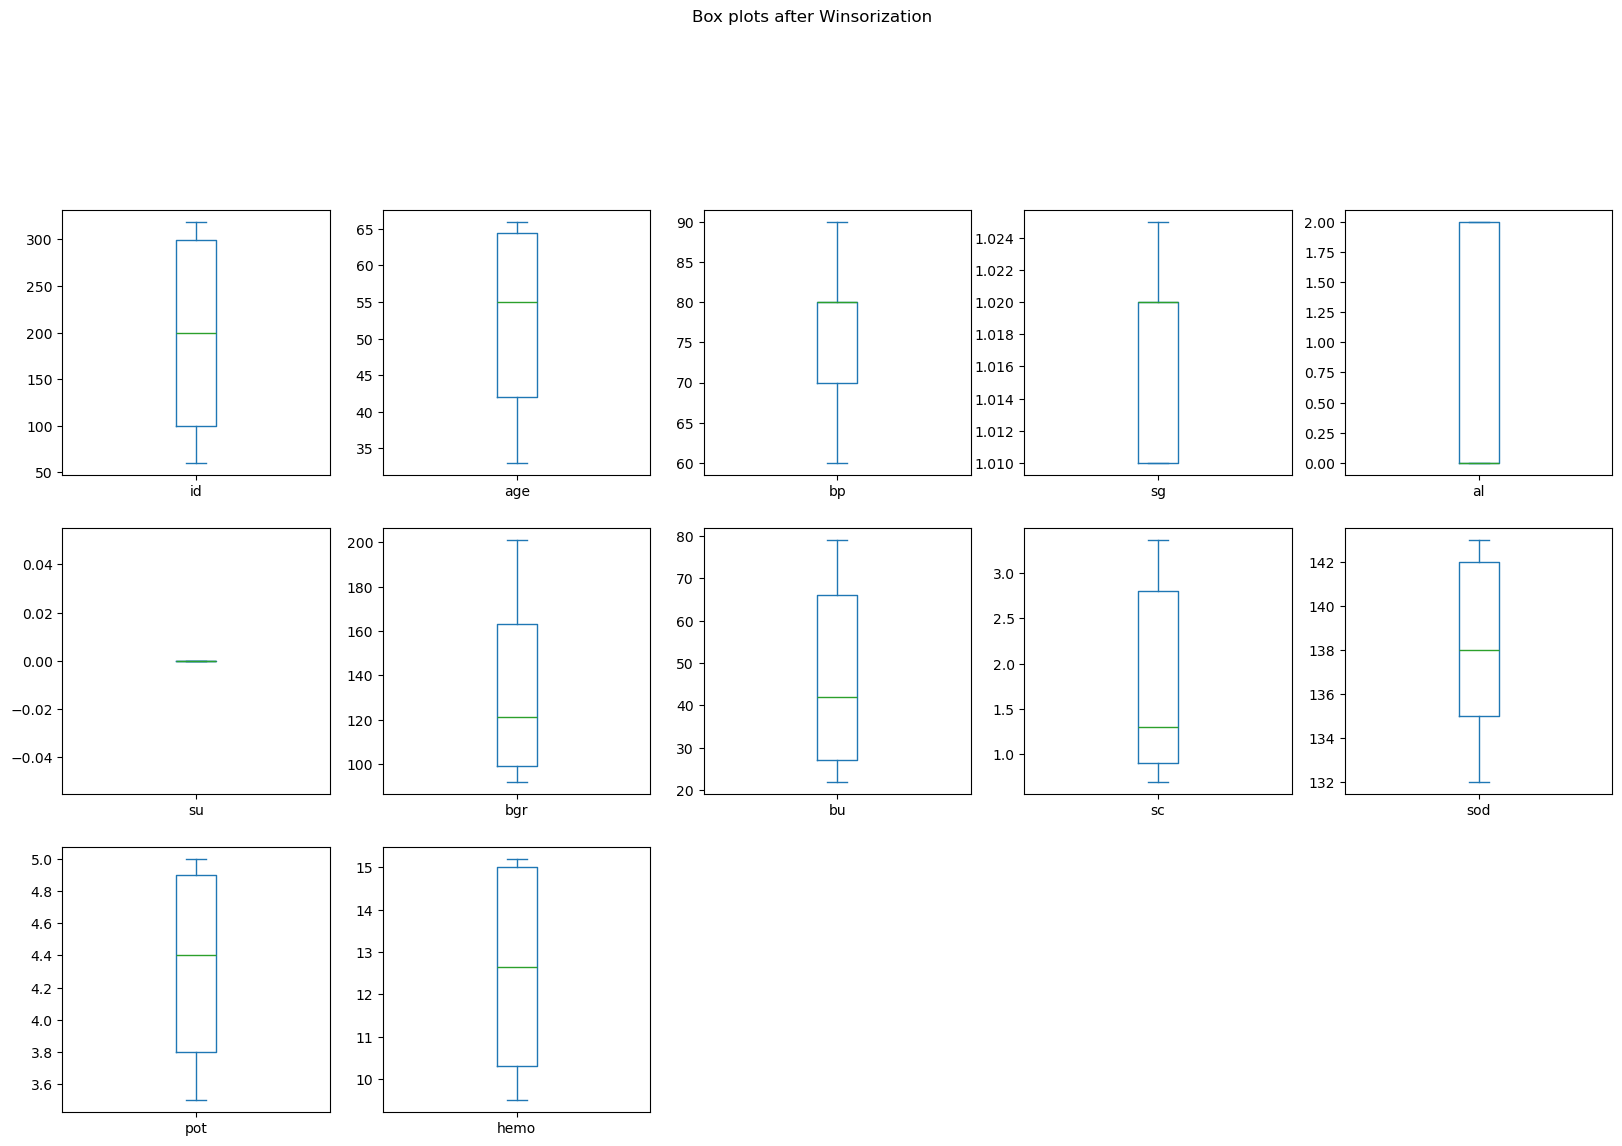

In [35]:
# Histograms before Winsorization
print("Histograms before Winsorization:")
data[numerical_columns].hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms before Winsorization')
plt.show()

# Histograms after Winsorization
print("Histograms after Winsorization:")
data_winsorized[numerical_columns].hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms after Winsorization')
plt.show()

# Box plots before Winsorization
print("Box plots before Winsorization:")
data[numerical_columns].plot(kind='box', subplots=True, layout=(5, 5), figsize=(20, 20), sharex=False, sharey=False)
plt.suptitle('Box plots before Winsorization')
plt.show()

# Box plots after Winsorization
print("Box plots after Winsorization:")
data_winsorized[numerical_columns].plot(kind='box', subplots=True, layout=(5, 5), figsize=(20, 20), sharex=False, sharey=False)
plt.suptitle('Box plots after Winsorization')
plt.show()


In [36]:
 data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [37]:
# Save the cleaned data after Winsorization
data_winsorized.to_csv('cleaned_ckd_data_winsorized.csv', index=False)
print("Cleaned data saved as 'cleaned_ckd_data_winsorized.csv'.")

Cleaned data saved as 'cleaned_ckd_data_winsorized.csv'.


               id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   50.503006 

<Figure size 1200x800 with 0 Axes>

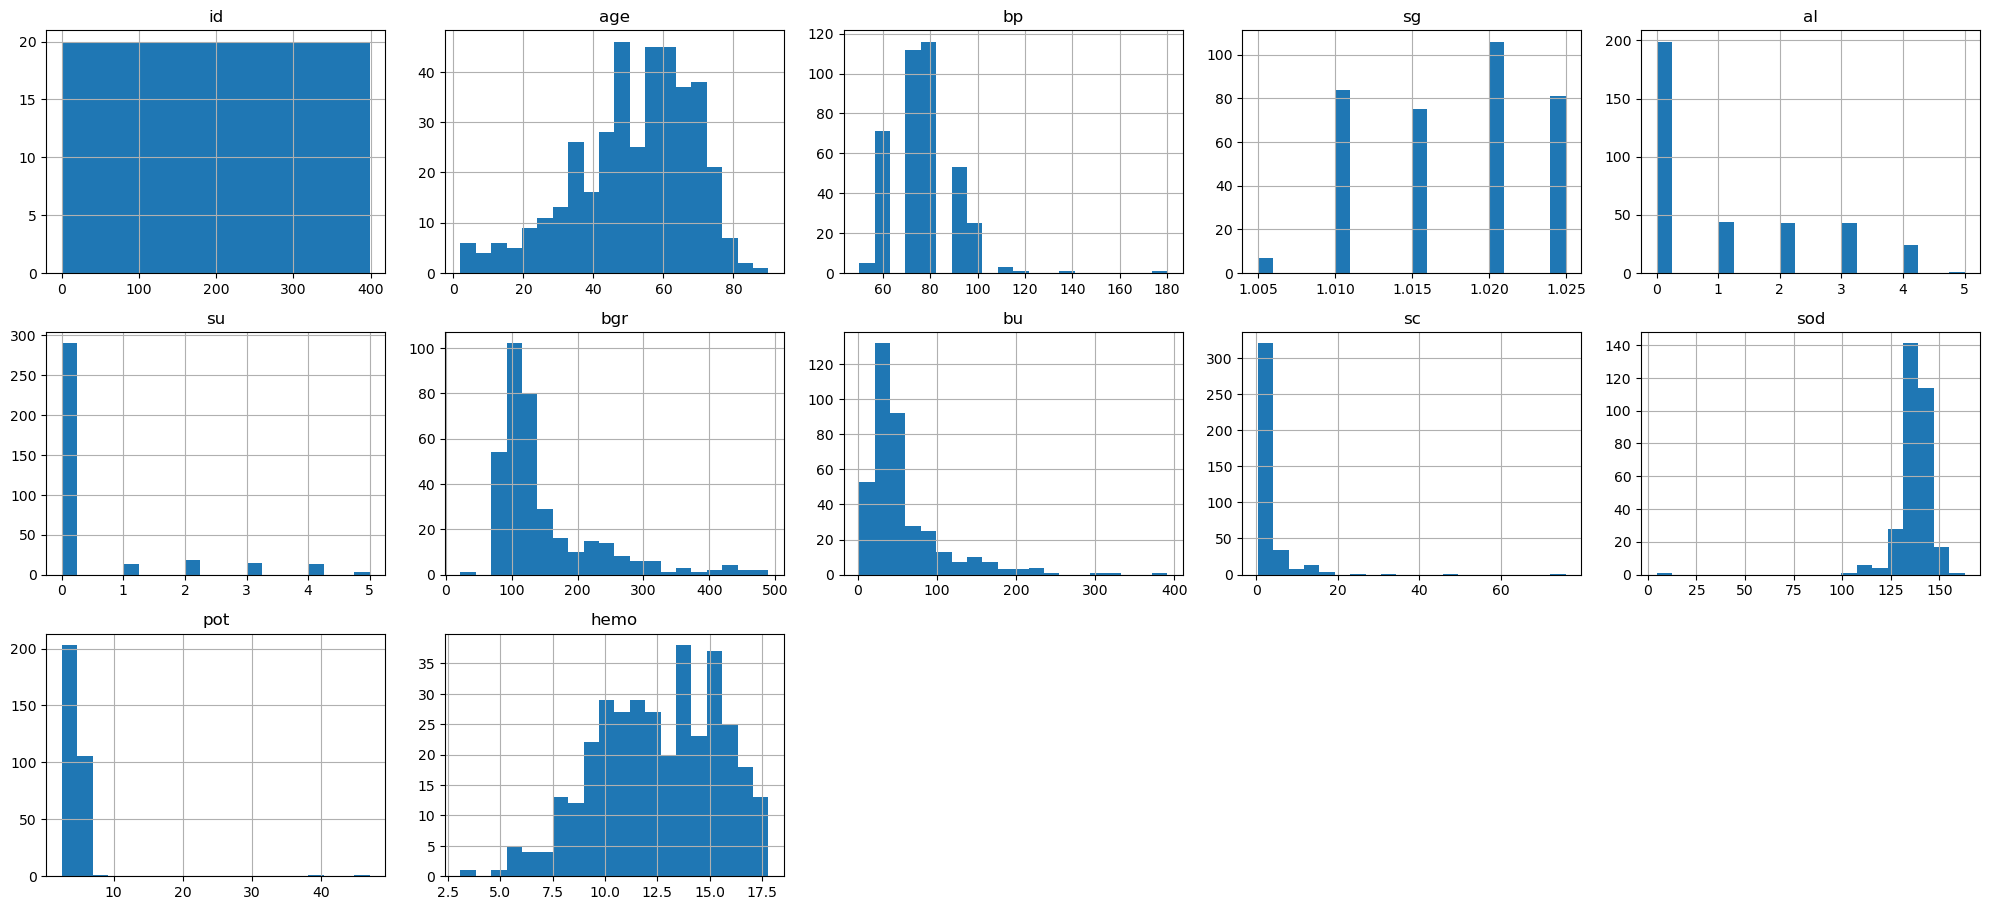

In [38]:
# Summary statistics
print(data.describe())

# Distribution plots
plt.figure(figsize=(12, 8))
data.hist(bins=20, figsize=(20, 15), layout=(5, 5))
plt.tight_layout()
plt.show()


c:\Users\shiva\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
c:\Users\shiva\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


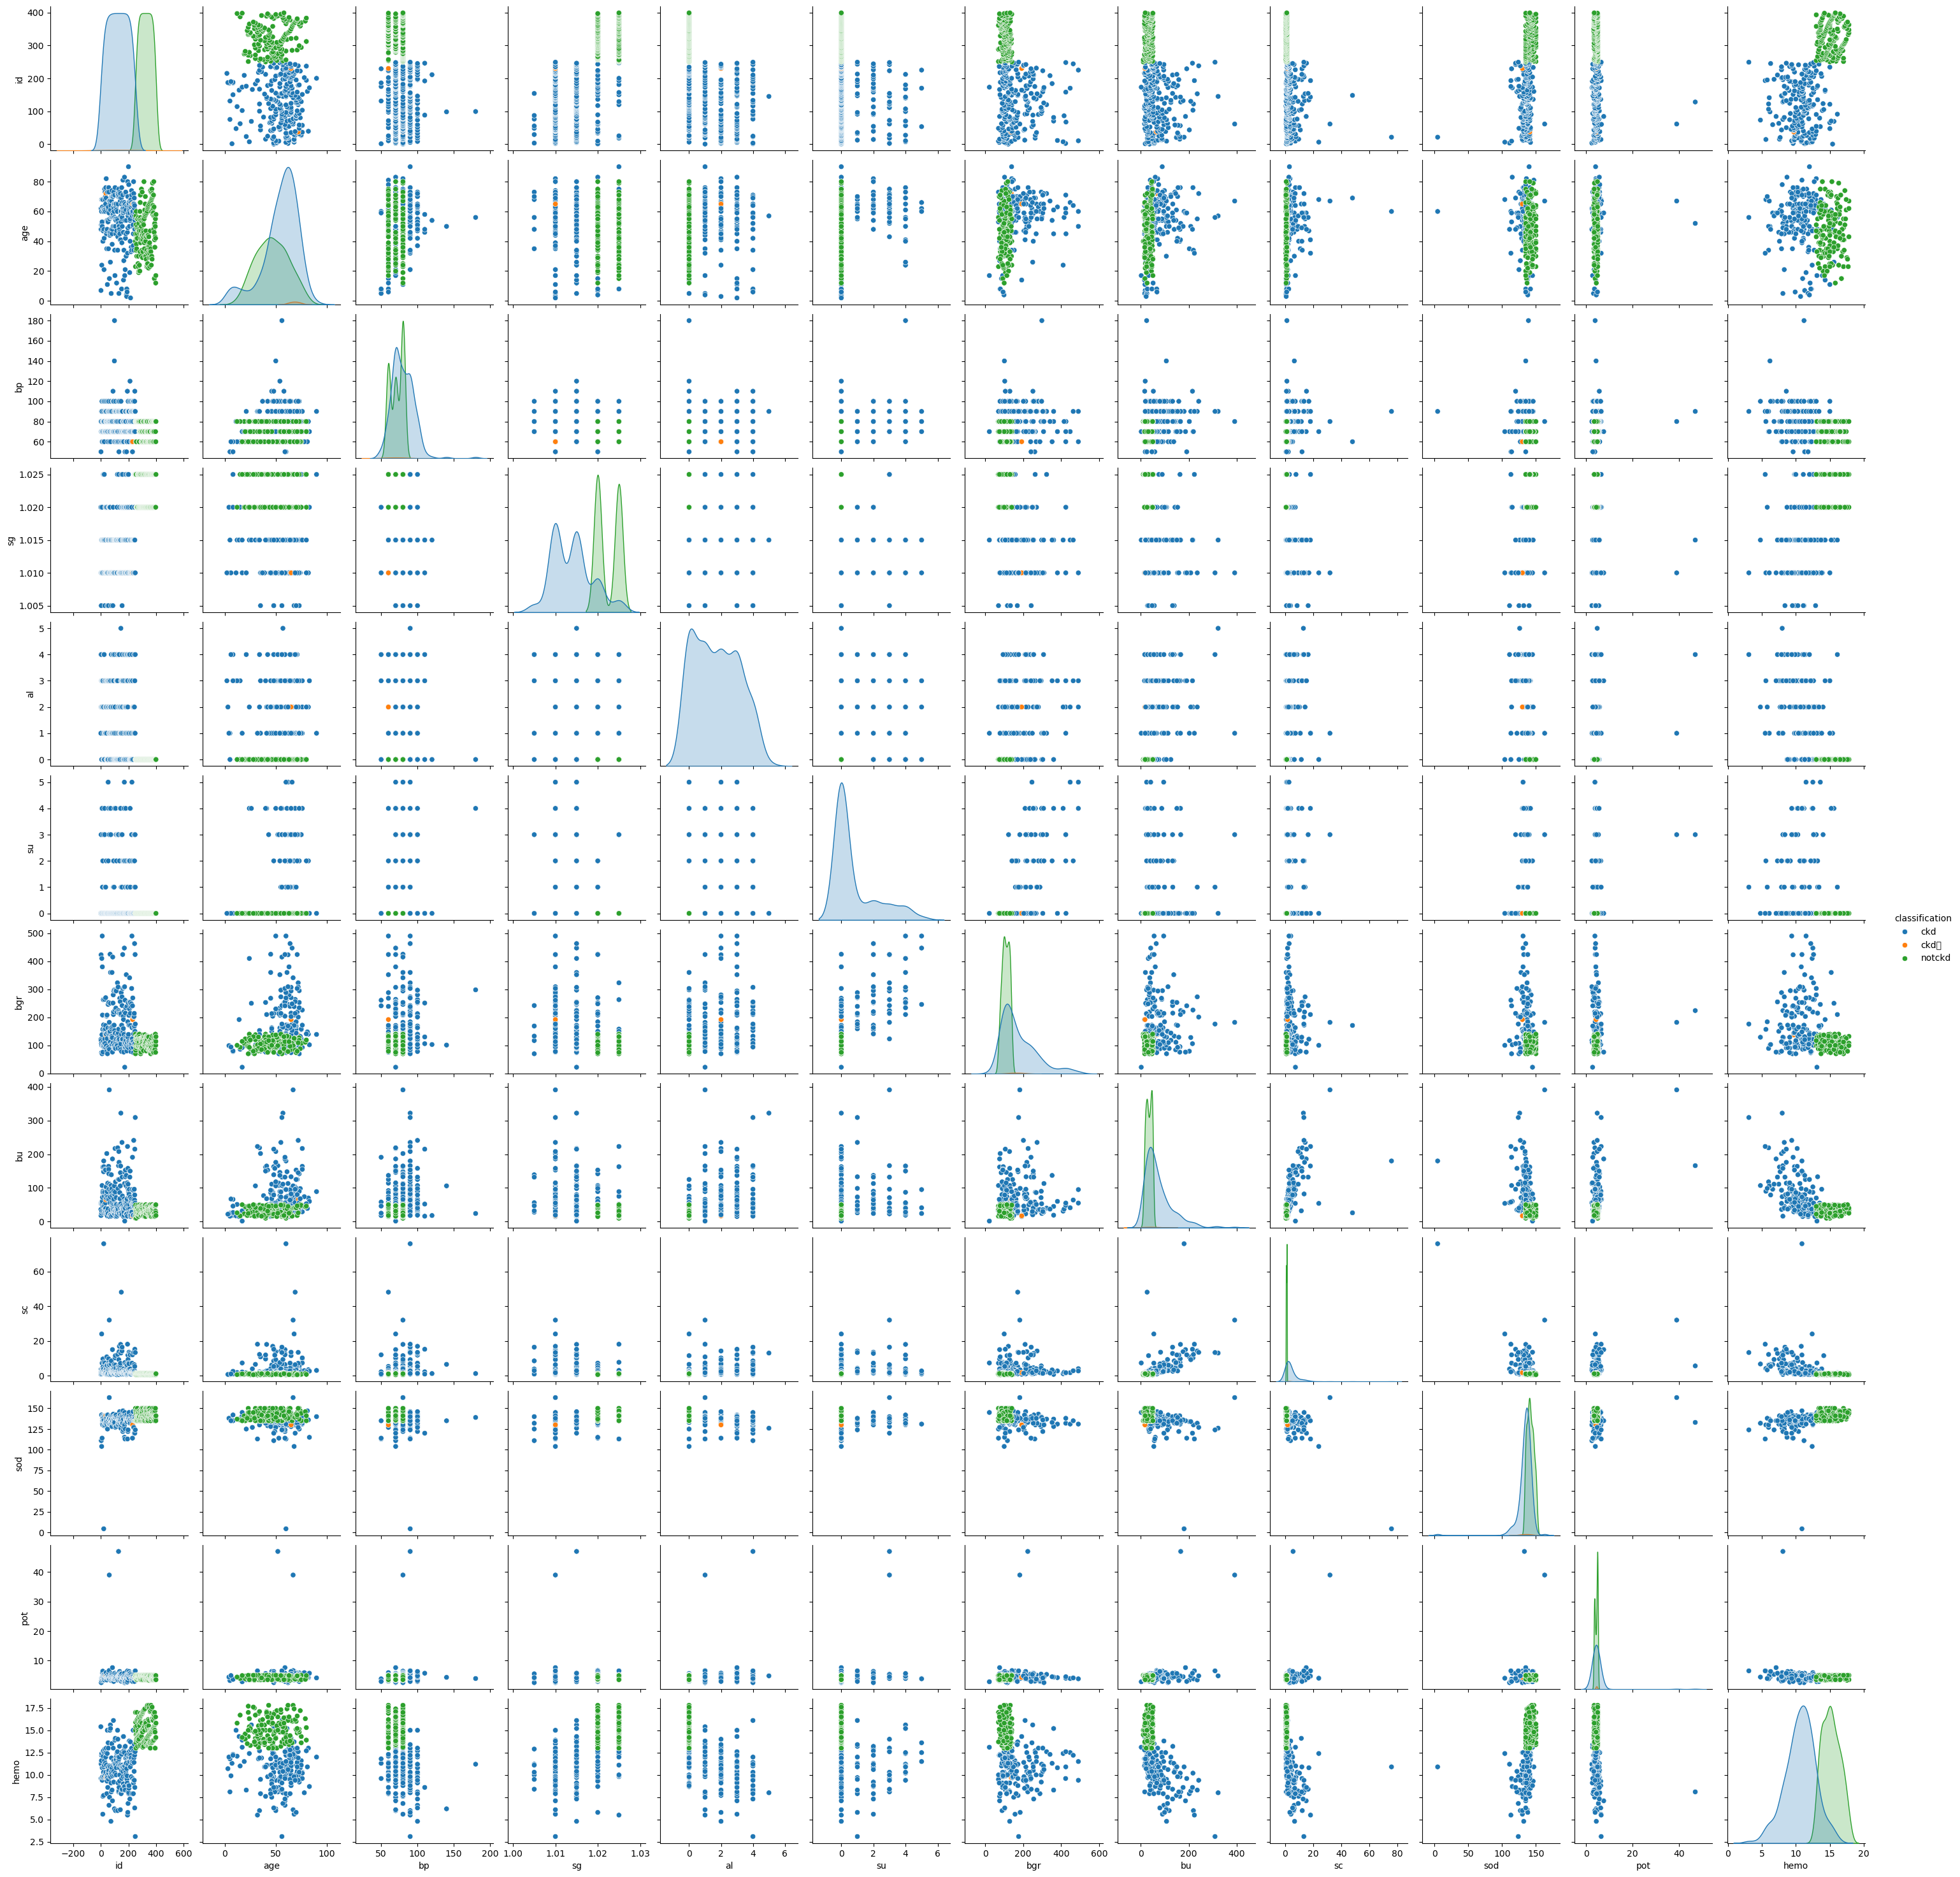

In [40]:
# Pair plot
sns.pairplot(data, hue='classification', diag_kind='kde')
plt.show()


Building a Model

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
!pip install streamlit
import streamlit as st

   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
    --------------------------------------- 10.2/413.4 kB ? eta -:--:--
    --------------------------------------- 10.2/413.4 kB ? eta -:--:--
   - ------------------------------------- 20.5/413.4 kB 131.3 kB/s eta 0:00:03
   -- ------------------------------------ 30.7/413.4 kB 187.9 kB/s eta 0:00:03
   --- ----------------------------------- 41.0/413.4 kB 196.9 kB/s eta 0:00:02
   -------- ------------------------------ 92.2/413.4 kB 350.1 kB/s eta 0:00:01
   ------------- ------------------------ 143.4/413.4 kB 502.3 kB/s eta 0:00:01
   -------------------- ----------------- 225.3/413.4 kB 689.2 kB/s eta 0:00:01
   -------------------------- ----------- 286.7/413.4 kB 737.3 kB/s eta 0:00:01
   -------------------------------------  409.6/413.4 kB 983.6 kB/s eta 0:00:01
   -------------------------------------- 413.4/413.4 kB 922.7 kB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation:

In [43]:
data = pd.read_csv('cleaned_ckd_data_winsorized.csv')

In [44]:
# Define features and target variable
X = data.drop(['id', 'classification'], axis=1)  # Drop 'id' and target column
y = data['classification']  # Target variable

In [45]:
# Step 1: Build Predictive Models
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train.shape

(320, 24)

In [47]:
X_test.shape

(80, 24)

In [48]:
y_train.shape

(320,)

In [49]:
y_test.shape

(80,)

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [51]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train)

# Transform the test data
X_test_encoded = encoder.transform(X_test)

# Convert to dense arrays if needed
X_train_encoded_dense = X_train_encoded.toarray()
X_test_encoded_dense = X_test_encoded.toarray()

In [52]:
# Initialize and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_encoded_dense, y_train)

LogisticRegression(random_state=42)

In [53]:
# Make predictions on the test set
y_pred = model.predict(X_test_encoded_dense)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the accuracy score
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[52  0]
 [ 0 28]]

Classification Report:
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        52
      notckd       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Accuracy Score:
1.0


In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined
# Initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train)

# Transform the test data
X_test_encoded = encoder.transform(X_test)

# Convert sparse matrix to dense array (optional, can be memory-heavy for large datasets)
X_train_encoded_dense = X_train_encoded.toarray()
X_test_encoded_dense = X_test_encoded.toarray()

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_encoded_dense, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_encoded_dense)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the accuracy score
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[52  0]
 [ 1 27]]

Classification Report:
              precision    recall  f1-score   support

         ckd       0.98      1.00      0.99        52
      notckd       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80


Accuracy Score:
0.9875


In [69]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.
